<a href="https://colab.research.google.com/github/venuannamdas/Singapore_Bank_Loan_Project/blob/master/BankLoanDefaultPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem:#
***Predicting Customer Loan Defaults Using AI Algorithms for a Fictitious 'Shantanu Bank of Singapore'***

#Problem :#
**Introduction:** In the past, trust-based assessment through enquiries is qualified for approval of loans in Singapore especially for housing, car and education.  The problem at hand is to shift from traditional method of loan approval to a robust reliable loan default prediction system based approval.

**Statement:**To develop AI models to predict the likelihood of a customer defaulting on a loan for a fictitious 'Shantanu Bank of Singapore. This is crucial for any financial institution to minimize the (1) risk exposure and make (2) informed lending decisions.

**Dataset:** The dataset contains historical data for the past 10 years which includes customer's financial information, employment status, and previous loan repayment history.

#Business Goals:#

**Risk Mitigation:** The primary objective is to reduce the risk of financial losses for the lending institution by accurately identifying customers who are more likely to default on their loans. This will help in minimizing bad loans and associated losses.

**Improved Decision-Making:** Enable the lending institution to make more informed and data-driven decisions when approving or denying loan applications. This leads to better allocation of resources and improved profitability.

**Customer-Centric Approach:** Ensure fair lending practices by assessing the creditworthiness of customers objectively, rather than relying solely on traditional metrics or subjective judgments.

**Cost Reduction:** By reducing the number of bad loans and defaults, the institution can save on collection and legal costs associated with loan recovery.

By addressing these business goals, the lending institution can build a reliable loan default prediction system that not only reduces financial risk but also enhances its reputation and competitiveness in the market.

#Solution Steps#
To successfully solve or mitigate the problem of predicting customer loan default using machine learning algorithms, we should broadly consider the following aspects:

1. Data Collection:

Gather historical loan data collected over a period of 10 years, which includs borrower information such as income, location  and whether loans were repaid or defaulted.
Ensure data privacy and compliance with data protection regulations (e.g., GDPR).
2. Data Preprocessing:

Handle missing data through imputation or removal.
Encode categorical variables (e.g., one-hot encoding or label encoding).
Normalize or standardize numerical features for consistent scales.
Address class imbalance issues if present (oversampling, undersampling, or synthetic data generation).
3. Exploratory Data Analysis (EDA):

Analyze the distribution of features and their relationships.
Identify potential patterns, correlations, and outliers.
Visualize data to gain insights.
Use EDA to inform feature selection and engineering.
4. Feature Selection/Engineering:

Select relevant features that influence loan defaults.
Create new features if they add predictive value.
Ensure ethical considerations in feature selection to avoid discriminatory practices.
5. Model Selection/ Training/Tuning and Evaluation

Choose appropriate machine learning algorithms. Consider ensemble methods to improve model performance. Ensure model interpretability and explainability.

Train machine learning models on the training dataset.
Perform hyperparameter tuning to optimize model performance using techniques like grid search or random search.

Evaluate models using appropriate metrics (e.g., accuracy, precision, recall, F1-score, ROC AUC, confusion matrix) but F1-Score is suitable for imbalance classifications.





**---------Start----------------------------------------------------**
.


.
---
.


#Solution Steps #  Step by  Step
To successfully solve or mitigate the problem of predicting customer loan default using machine learning algorithms, you should broadly consider the following aspects:

#1. Data Collection:#
*Collection, Assessment and Modification for Singapore use* : In the past, trust-based assessment through enquiries is qualified for approval of loans in Singapore especially for housing, car and education. But now, any bank wants to forecast who would default based on what they’ve experienced. In the present case, a fictitious bank named 'Shantanu Bank of Singapore' has the data on previous client behaviour. As a result, when they gain new consumers, they would know if the customer may default on his loan. The data contains demographic features of each customer and a target variable (loan settled or defaulted) which shows whether they will default on the loan or not.


Basic Dataset Source : https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior  , taken from an unknown Indian bank  but it is transformed for local Singapore application

In [168]:
#Loading - the data is copied to my github, and from there it is accessed.

In [277]:
Bank_csv = 'https://raw.githubusercontent.com/venuannamdas/Data2023/master/BankTrainingData.csv'

Let us install some of the packages for use in the project

In [170]:
pip install plotly

In [171]:
pip install geopandas matplotlib


In [172]:
pip install folium

In [173]:
pip install category_encoders

In [174]:
pip install scikit-learn

In [175]:
pip install -U imbalanced-learn


In [176]:
pip install scipy

In [274]:
pip install seaborn

In [177]:
pip install tabulate


Load/Import Libraries

In [275]:
import numpy as np  #For Linear algebra
import pandas as pd #For Data Processing
import random       #For Randomness
import geopandas as gpd
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import category_encoders as ce

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from plotly.subplots import make_subplots
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from tabulate import tabulate
from scipy import stats

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    auc,
    confusion_matrix,
    precision_recall_curve,
    average_precision_score,
)

%matplotlib inline
sns.set_theme(style = "darkgrid")

In [278]:
#Read the data
df_bank = pd.read_csv(Bank_csv)

In [279]:
df_bank.head(5)

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0                 13          0  
1                 13          0  
2                 10          0  
3                 12          1  
4                 14          1

In [181]:
df_bank.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [281]:
df_bank.shape

(252000, 13)

This dataframe, df_bank, contains data related to india, so let us modify for singapore application (let us load another CSV which includes singapore district, latitude and logitude  @ github) and remove Indian city and states.

In [182]:
# URL of the Singapore CSV
lalo_url = 'https://raw.githubusercontent.com/venuannamdas/Data2023/master/SingaporeLAT_LON.csv'

# Read the Excel file from the URL
df_lalo = pd.read_csv(lalo_url)

In [183]:
df_lalo.sample(5)

District  Latitude  Longitude
18      Punggol    1.3985   103.9079
5   Bukit Batok    1.3500   103.7493
24   Toa Payoh     1.3315   103.8495
19   Queenstown    1.2988   103.8040
23     Tampines    1.3525   103.9446

Let us use the above information to create a dataframe 'local'  with same number of observations, for singapore customer use, as follows

In [184]:
# Set a random seed for repeatability
random.seed(42)

# Get the number of rows in df_lalo
num_rows_df_lalo = df_lalo.shape[0]

# DataFrame 'df_bank'- sampling with replacement to repeat the observations
num_repetitions = 252000 // num_rows_df_lalo  # Calculate how many times to repeat the observations
remainder = 252000 % num_rows_df_lalo  # Calculate the remaining rows

# Create a list to hold the repeated observations
repeated_observations = []

# Repeat the observations
for _ in range(num_repetitions):
    repeated_observations.extend(df_lalo[['District', 'Latitude', 'Longitude']].values.tolist())

# If there are remaining rows, sample them and append to the repeated observations
if remainder > 0:
    remaining_sample = df_lalo[['District', 'Latitude', 'Longitude']].sample(n=remainder, random_state=42)
    repeated_observations.extend(remaining_sample.values.tolist())

# Create the 'df_bank' DataFrame from the repeated observations
local = pd.DataFrame(repeated_observations, columns=['District', 'Latitude', 'Longitude'])

# Print the first few rows of the 'df_bank' DataFrame
print(local.head())



        District  Latitude  Longitude
0   Central Area    1.3869   103.8008
1  Marine Parade    1.3013   103.9049
2         Bishan    1.3504   103.8488
3    Ang Mo Kio     1.3717   103.8476
4          Bedok    1.3247   103.9324


Next, we will create three new columns ('District', 'Latitude, 'Longitude') in our first dataframe, df_bank, and drop columns 'CITY' and 'STATE'. So we are transforming the original data for local study as follows

In [283]:
df_bank[['District', 'Latitude', 'Longitude']]= local[['District', 'Latitude', 'Longitude']]

In [284]:
df_bank.drop(['CITY', 'STATE'], axis=1, inplace=True)

Local conversation- changing salary from Indian INR to singapore SGD by multiplying 'income' with 0.016 (currency conversion rate in September 2023), and drop column 'Income'

In [285]:
df_bank['Income_SGD'] = df_bank['Income'] * 0.016

In [286]:
df_bank.drop(['Income'], axis=1, inplace=True)

In [189]:
df_bank.sample(5)

Id  Age  Experience Married/Single House_Ownership Car_Ownership  \
191041  191042   51           5         single          rented            no   
103627  103628   47          16         single          rented           yes   
175181  175182   43          12         single          rented            no   
102119  102120   54           6         single          rented            no   
232636  232637   27          10         single          rented            no   

               Profession  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  \
191041   Technical_writer                4                 11          0   
103627    Design_Engineer                4                 13          0   
175181   Flight_attendant                8                 13          0   
102119            Surgeon                6                 10          0   
232636  Financial_Analyst                3                 12          0   

             District  Latitude  Longitude  Income_SGD  
191041         Mandai    1.4252   103.8158    9694.048  
103627  Marine Parade    1.3013   103.9049   44489.472  
175181    Bukit Batok    1.3500   103.7493  157876.160  
102119    Bukit Batok    1.3500   103.7493   48923.168  
232636          Bedok    1.3247   103.9324  151268.752

Furthermore, let us bring financial aspect into our data, it helps in business decision. when Risk_Flag is 0, there is no loss to bank but if Risk_Flag is 1, there is a loss. Let us fix this loss as two times the income of the individual and add a new column as follows.

In [287]:
# create a new 'Loan_loss' column based on our conditions

df_bank['Loan_loss'] = 0  # Initialize 'Loan_loss' column with zeros for all rows

# Apply the condition for rows where 'Risk_Flag' is equal to 1
df_bank.loc[df_bank['Risk_Flag'] == 1, 'Loan_loss'] = 2 * df_bank.loc[df_bank['Risk_Flag'] == 1, 'Income_SGD']


This final dataframe (df_bank) is OUR COLLECTION WITH MODIFICATION for local use

In [288]:
df_bank.sample(5)

Id  Age  Experience Married/Single House_Ownership Car_Ownership  \
20627    20628   23          15         single          rented            no   
179849  179850   77          17         single          rented           yes   
130143  130144   65          10        married          rented           yes   
249078  249079   61           0         single          rented            no   
215538  215539   64          20        married          rented           yes   

                  Profession  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  \
20627   Chartered_Accountant                4                 12          1   
179849               Surgeon               12                 14          0   
130143   Industrial_Engineer                9                 14          0   
249078        Police_officer                0                 13          0   
215538             Secretary                5                 12          1   

           District  Latitude  Longitude  Income_SGD   Loan_loss  
20627        Yishun    1.4157   103.8390   53951.328  107902.656  
179849       Bishan    1.3504   103.8488   47146.016       0.000  
130143  Ang Mo Kio     1.3717   103.8476  139803.024       0.000  
249078  Ang Mo Kio     1.3717   103.8476  152555.488       0.000  
215538   Toa Payoh     1.3315   103.8495  121327.152  242654.304

#2.Data Preprocessing:#
Handle missing data through imputation or removal.

Encode categorical variables (e.g., one-hot encoding or label encoding).

Normalize or standardize numerical features for consistent scales.

Address class imbalance issues if present.

In [192]:
df_bank.shape

(252000, 15)

In [193]:
df_bank.size

3780000

we see that the data is 252000 rows, that is 252000 data points with 1 output feature (Risk_Flag), another 14 variables and 1 loan loss component

Now we check the data types and other information.

In [194]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 252000 non-null  int64  
 1   Age                252000 non-null  int64  
 2   Experience         252000 non-null  int64  
 3   Married/Single     252000 non-null  object 
 4   House_Ownership    252000 non-null  object 
 5   Car_Ownership      252000 non-null  object 
 6   Profession         252000 non-null  object 
 7   CURRENT_JOB_YRS    252000 non-null  int64  
 8   CURRENT_HOUSE_YRS  252000 non-null  int64  
 9   Risk_Flag          252000 non-null  int64  
 10  District           252000 non-null  object 
 11  Latitude           252000 non-null  float64
 12  Longitude          252000 non-null  float64
 13  Income_SGD         252000 non-null  float64
 14  Loan_loss          252000 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 28

we see that half the features are numeric and half are string, so they are categorical features.

Numerical data is the representation of measurable quantities of a phenomenon. We call numerical data “quantitative data” in data science because it describes the quantity of the object it represents.

Categorical data refers to the properties of a phenomenon that can be named. This involves describing the names or qualities of objects with words. Categorical data is referred to as “qualitative data” in data science since it describes the quality of the entity it represents.

In [195]:
numeric_columns = df_bank.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Id', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag', 'Latitude', 'Longitude', 'Income_SGD', 'Loan_loss'],
      dtype='object')

In [196]:
#Let us check if there are any missing values in the data.

df_bank.isnull().sum()

Id                   0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
District             0
Latitude             0
Longitude            0
Income_SGD           0
Loan_loss            0
dtype: int64

In [289]:
df_bank.columns

Index(['Id', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag', 'District', 'Latitude', 'Longitude', 'Income_SGD',
       'Loan_loss'],
      dtype='object')

Analysis: Numerical Columns

First, we start with the analysis of numerical data.



In [198]:
df_bank.describe()

Id            Age     Experience  CURRENT_JOB_YRS  \
count  252000.000000  252000.000000  252000.000000    252000.000000   
mean   126000.500000      49.954071      10.084437         6.333877   
std     72746.278255      17.063855       6.002590         3.647053   
min         1.000000      21.000000       0.000000         0.000000   
25%     63000.750000      35.000000       5.000000         3.000000   
50%    126000.500000      50.000000      10.000000         6.000000   
75%    189000.250000      65.000000      15.000000         9.000000   
max    252000.000000      79.000000      20.000000        14.000000   

       CURRENT_HOUSE_YRS      Risk_Flag       Latitude      Longitude  \
count      252000.000000  252000.000000  252000.000000  252000.000000   
mean           11.997794       0.123000       1.359189     103.842689   
std             1.399037       0.328438       0.041503       0.069429   
min            10.000000       0.000000       1.282700     103.711300   
25%            11.000000       0.000000       1.324700     103.786100   
50%            12.000000       0.000000       1.353400     103.847600   
75%            13.000000       0.000000       1.386900     103.899500   
max            14.000000       1.000000       1.448200     103.975000   

          Income_SGD      Loan_loss  
count  252000.000000  252000.000000  
mean    79953.866645   19575.140386  
std     46052.976218   61699.504950  
min       164.960000       0.000000  
25%     40048.240000       0.000000  
50%     80011.112000       0.000000  
75%    119640.032000       0.000000  
max    159999.008000  319824.032000

In [290]:
df_bank.head(5)

Id  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1   23           3         single          rented            no   
1   2   40          10         single          rented            no   
2   3   66           4        married          rented            no   
3   4   41           2         single          rented           yes   
4   5   47          11         single          rented            no   

            Profession  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  \
0  Mechanical_engineer                3                 13          0   
1   Software_Developer                9                 13          0   
2     Technical_writer                4                 10          0   
3   Software_Developer                2                 12          1   
4        Civil_servant                3                 14          1   

        District  Latitude  Longitude  Income_SGD   Loan_loss  
0   Central Area    1.3869   103.8008   20861.344       0.000  
1  Marine Parade    1.3013   103.9049  121192.256       0.000  
2         Bishan    1.3504   103.8488   63869.040       0.000  
3    Ang Mo Kio     1.3717   103.8476  100103.216  200206.432  
4          Bedok    1.3247   103.9324   92301.936  184603.872

In [291]:
#Id is a unique identifyer, so let us drop it
df_bank.drop(['Id'], axis=1, inplace=True)

**column 'Risk_Flag' is the target variable, which is a category variable. let us evaluate it**

In [201]:
risk_flag_counts = df_bank['Risk_Flag'].value_counts().reset_index()
risk_flag_counts.columns = ['Risk_Flag', 'Count']

# Create a pie chart
fig = px.pie(
    risk_flag_counts,
    names='Risk_Flag',
    values='Count',
    title='Risk Flag Distribution',
)

# Add annotations for value counts
fig.update_traces(
    textinfo='percent+label',
    hoverinfo='percent+label+value',
    textfont_size=14,  # Adjust text size as needed
)

# Customize the layout
fig.update_layout(
    title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
    font=dict(color='#8a8d93'),
    plot_bgcolor='#2d3035',
    paper_bgcolor='#2d3035',
)

# Show the pie chart
fig.show()

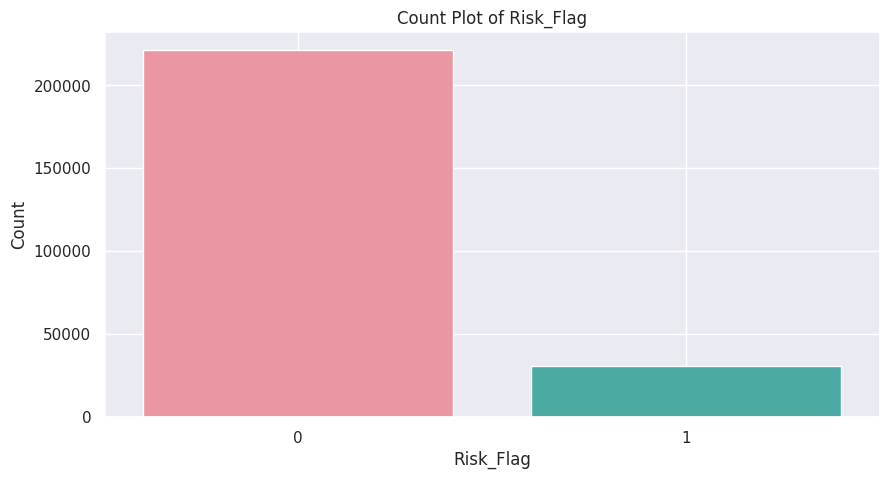

In [202]:
# Set a custom color palette with a shade of blue
custom_palette = ["#3498db"]  # You can adjust the shade of blue if needed

# Create a count plot for 'Risk_Flag' with the custom color palette
plt.figure(figsize=(10, 5))
sns.set_palette(custom_palette)
sns.countplot(x='Risk_Flag', data=df_bank)
plt.title('Count Plot of Risk_Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [203]:
df_bank['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [204]:
#Only a small part of the target variable consists of people who default on loans.

In [205]:
#Missing value Check

In [206]:
df_bank.isnull().sum()

Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
District             0
Latitude             0
Longitude            0
Income_SGD           0
Loan_loss            0
dtype: int64

In [207]:
#Outliers check

In [208]:
# Outliers
columns_to_check = ['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS','Income_SGD', 'Loan_loss']

# Calculate Z-scores for the selected columns
z_scores = df_bank[columns_to_check].apply(stats.zscore)

# Define a Z-score threshold for identifying outliers
threshold = 3.0  # You can adjust this threshold as needed

# Count the outliers for each column
outlier_counts = (z_scores > threshold).sum()

# Calculate the percentage of outliers for each column
total_counts = len(df_bank)
outlier_percentages = (outlier_counts / total_counts) * 100

# Print the percentage of outliers for each column
for column, percentage in zip(columns_to_check, outlier_percentages):
    print(f"Percentage of outliers in {column}: {percentage:.2f}%")

print(df_bank.columns)



Percentage of outliers in Age: 0.00%
Percentage of outliers in Experience: 0.00%
Percentage of outliers in CURRENT_JOB_YRS: 0.00%
Percentage of outliers in CURRENT_HOUSE_YRS: 0.00%
Percentage of outliers in Income_SGD: 0.00%
Percentage of outliers in Loan_loss: 4.45%
Index(['Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag', 'District', 'Latitude', 'Longitude', 'Income_SGD',
       'Loan_loss'],
      dtype='object')


we see that only the Loan_Loss has outliers but we cannot drop this as we created it to bring a meaneaful estimates or to calculate loss incurred due to loan defaults. so let us retain it.

THERE ARE NO MISSING VALUES

Now, we plot the correlation & look into other predictors/features

<ipython-input-209-4c3825784b89>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



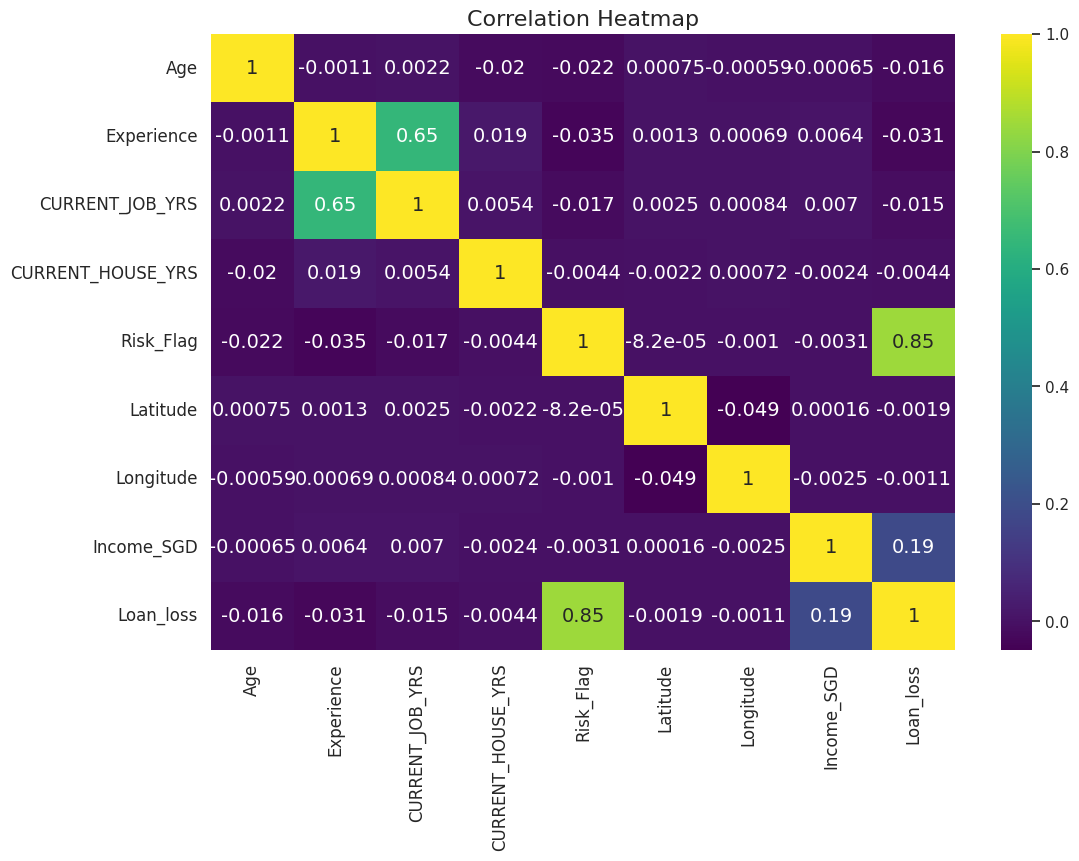

In [209]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate the correlation matrix
corr_matrix = df_bank.corr()

# Choose a colorful colormap (e.g., "viridis")
cmap = "viridis"

# Create a heatmap with annotations
corr_heatmap = sns.heatmap(
    corr_matrix, cmap=cmap, annot=True, ax=ax, annot_kws={"size": 14}
)

# Customize the plot
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


we can see higher correlation exists between (1) 'Experience' and 'Current job years'  and (2)  Risk_Flag and Loan_Loss. let us investigate further...

 as follows

#3. Exploratory Data Analysis (EDA):

Analyze the distribution of features and their relationships.
Identify potential patterns, correlations after modifications, and outliers.
Visualize data to gain insights.
Use EDA to inform feature selection and engineering.

In [210]:
df_bank.columns

Index(['Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag', 'District', 'Latitude', 'Longitude', 'Income_SGD',
       'Loan_loss'],
      dtype='object')

In [211]:
#Let us look at pair plots to understand interdependencies of numeric variables using Correlation

In [212]:
df_bank.dtypes

Age                    int64
Experience             int64
Married/Single        object
House_Ownership       object
Car_Ownership         object
Profession            object
CURRENT_JOB_YRS        int64
CURRENT_HOUSE_YRS      int64
Risk_Flag              int64
District              object
Latitude             float64
Longitude            float64
Income_SGD           float64
Loan_loss            float64
dtype: object

In [213]:
#numeric columns
numeric_columns = df_bank.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag', 'Latitude', 'Longitude', 'Income_SGD', 'Loan_loss'],
      dtype='object')

In [214]:
#PAIR PLOTS

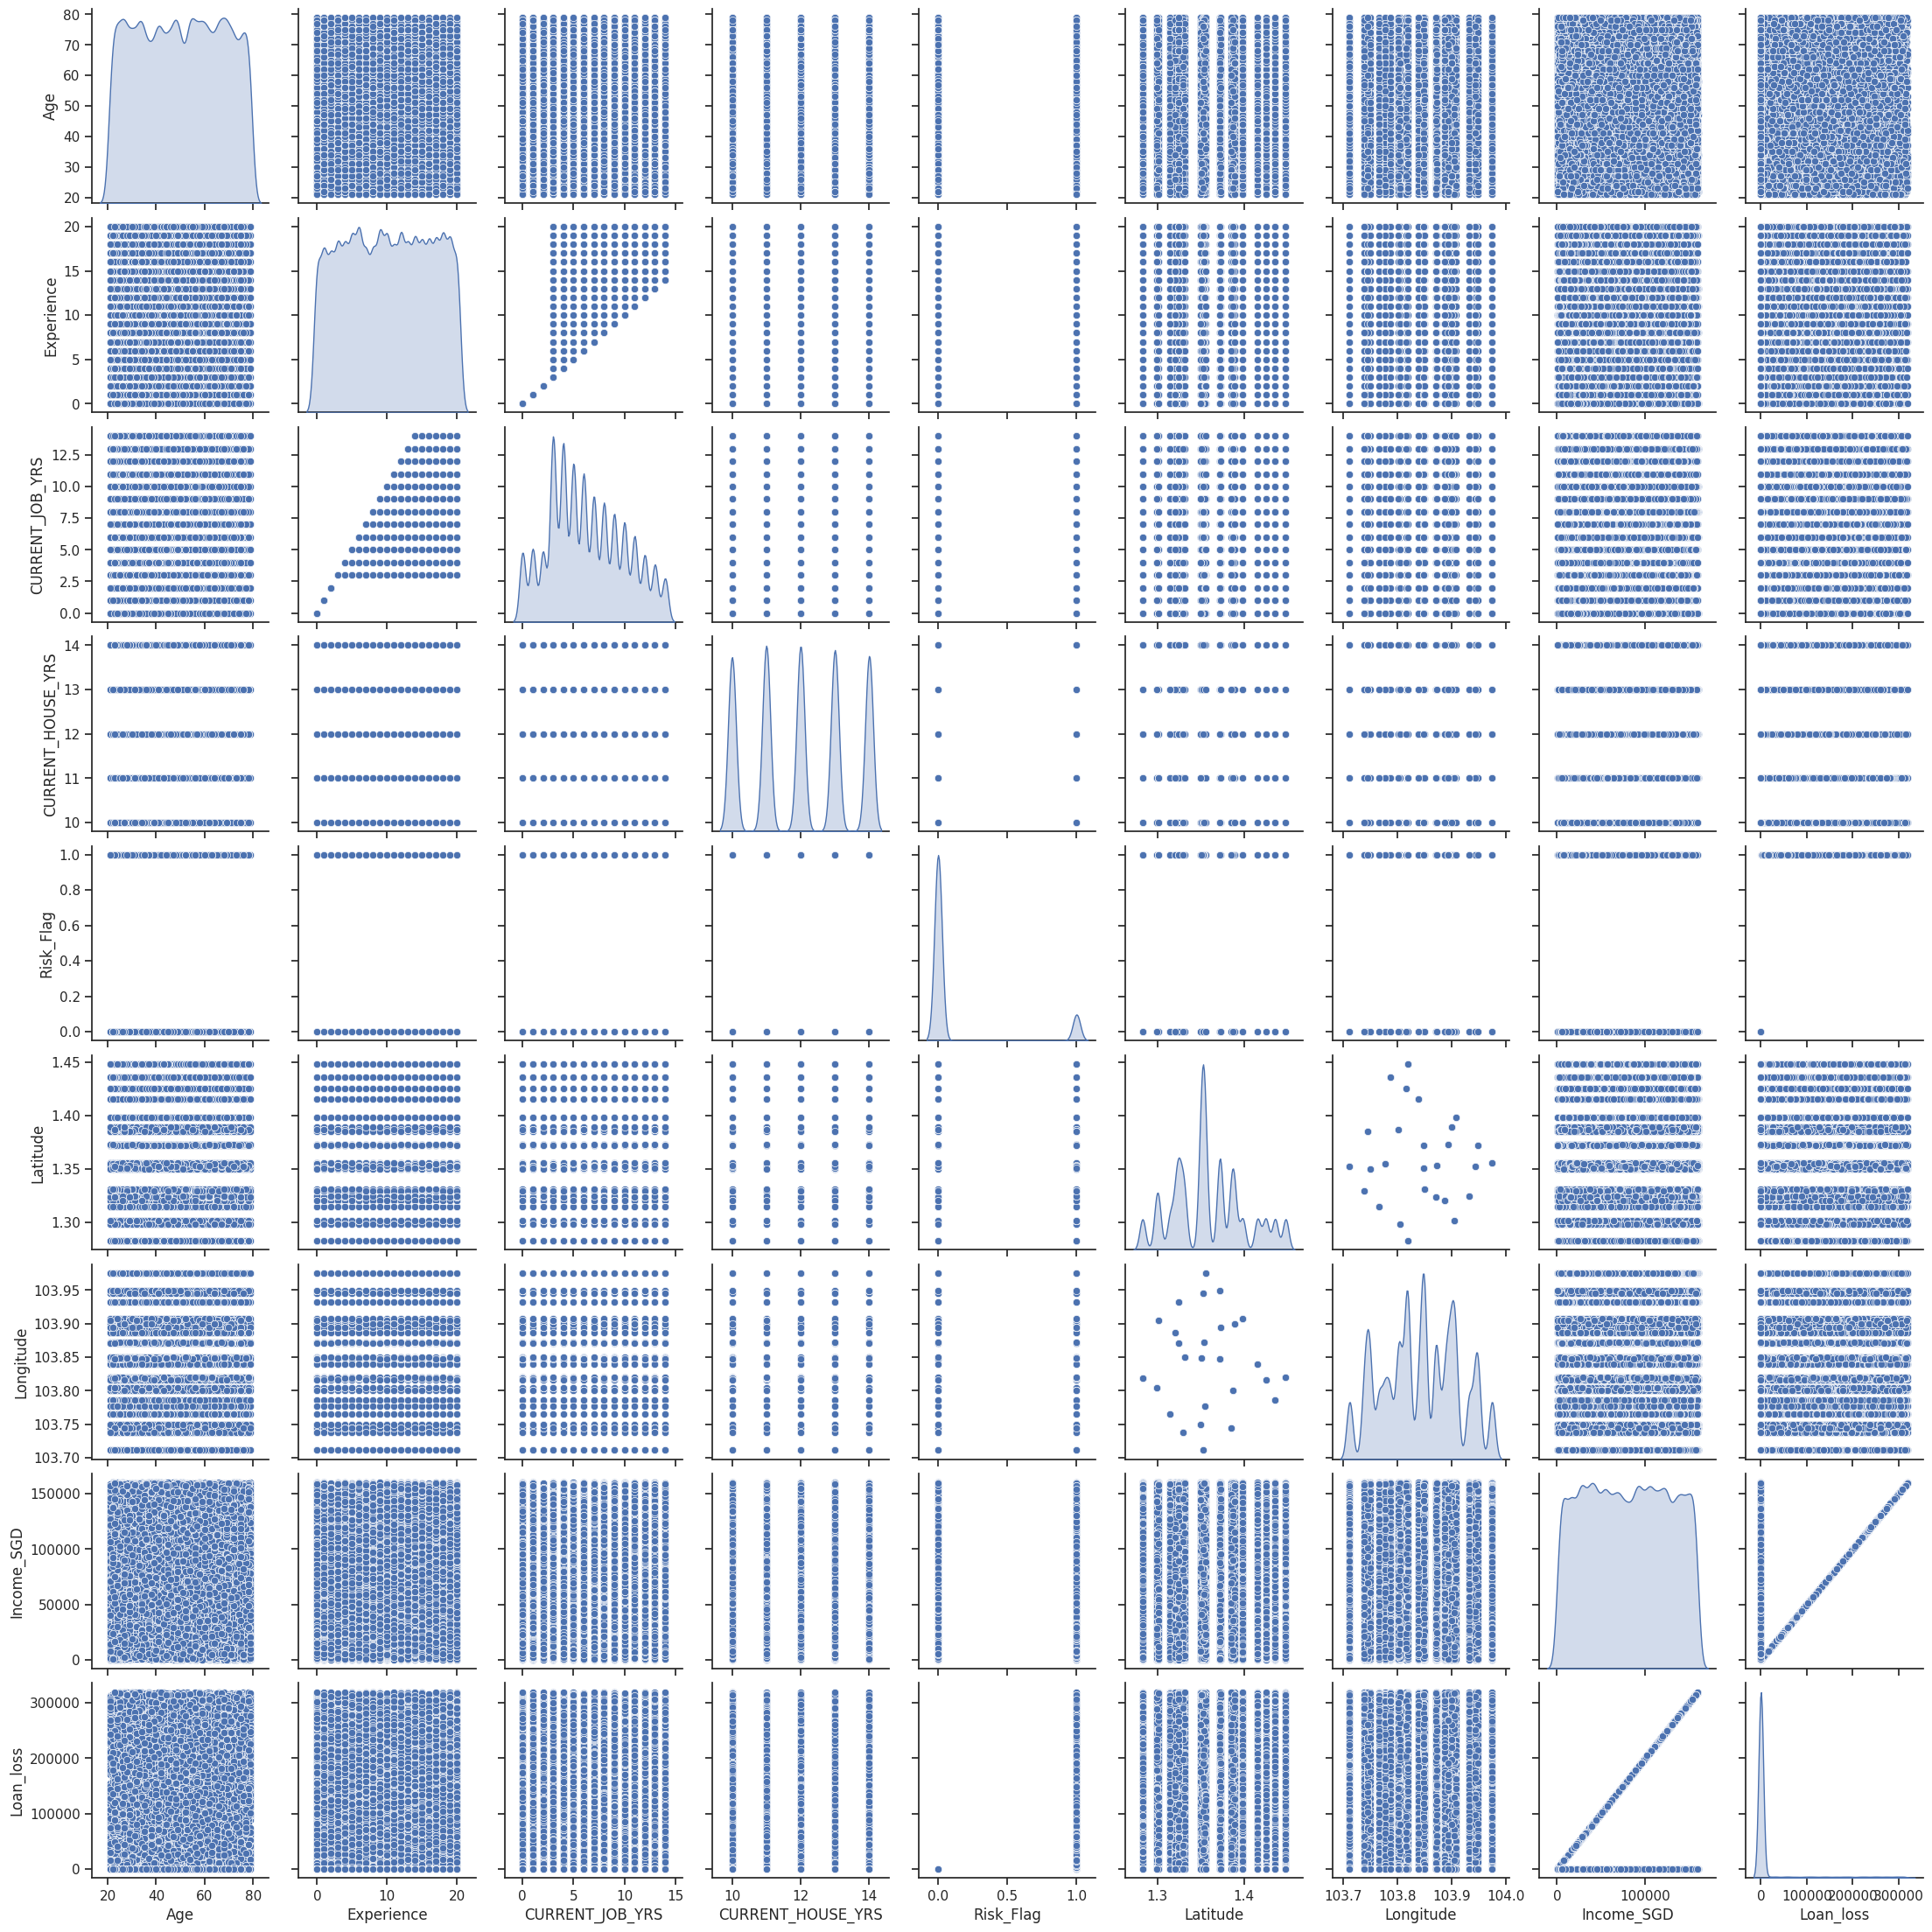

In [215]:
# Assuming you have loaded your data into a DataFrame called df_bank

# Create a pair plot
sns.set(style="ticks")
sns.pairplot(df_bank, diag_kind="kde")

# Show the plot
plt.show()


**We know that Risk_Flag is our target variable, which is classified as 0, 1. **
However the above pair plot is clumsy so Let us look into some individual histogram/scatter plots and also look into sub-pair plots i.e for Risk_Flag ==1 and 0, for interesting data insights

--> Age and  Income_SGD

In [216]:
# Create a scatter plot between 'Age' and 'Income_SGD'
fig = px.scatter(
    df_bank,
    x='Age',
    y='Income_SGD',
    title='Age vs. Income_SGD',
    color_discrete_sequence=px.colors.qualitative.Set1,  # Specify a color palette
)

# Customize the layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Income_SGD',
    title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
    font=dict(color='#8a8d93'),
    plot_bgcolor='#2d3035',
    paper_bgcolor='#2d3035',
)

# Show the scatter plot
fig.show()

# Create a histogram for 'Age' to visualize its distribution
fig_age_distribution = px.histogram(
    df_bank,
    x='Age',
    title='Age Distribution',
    color_discrete_sequence=['#03DAC5'],
)

# Customize the layout of the age distribution histogram
fig_age_distribution.update_layout(
    xaxis_title='Age',
    yaxis_title='Frequency',
    title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
    font=dict(color='#8a8d93'),
    plot_bgcolor='#2d3035',
    paper_bgcolor='#2d3035',
)

# Show the age distribution histogram
fig_age_distribution.show()

Histogram of some numeric variables

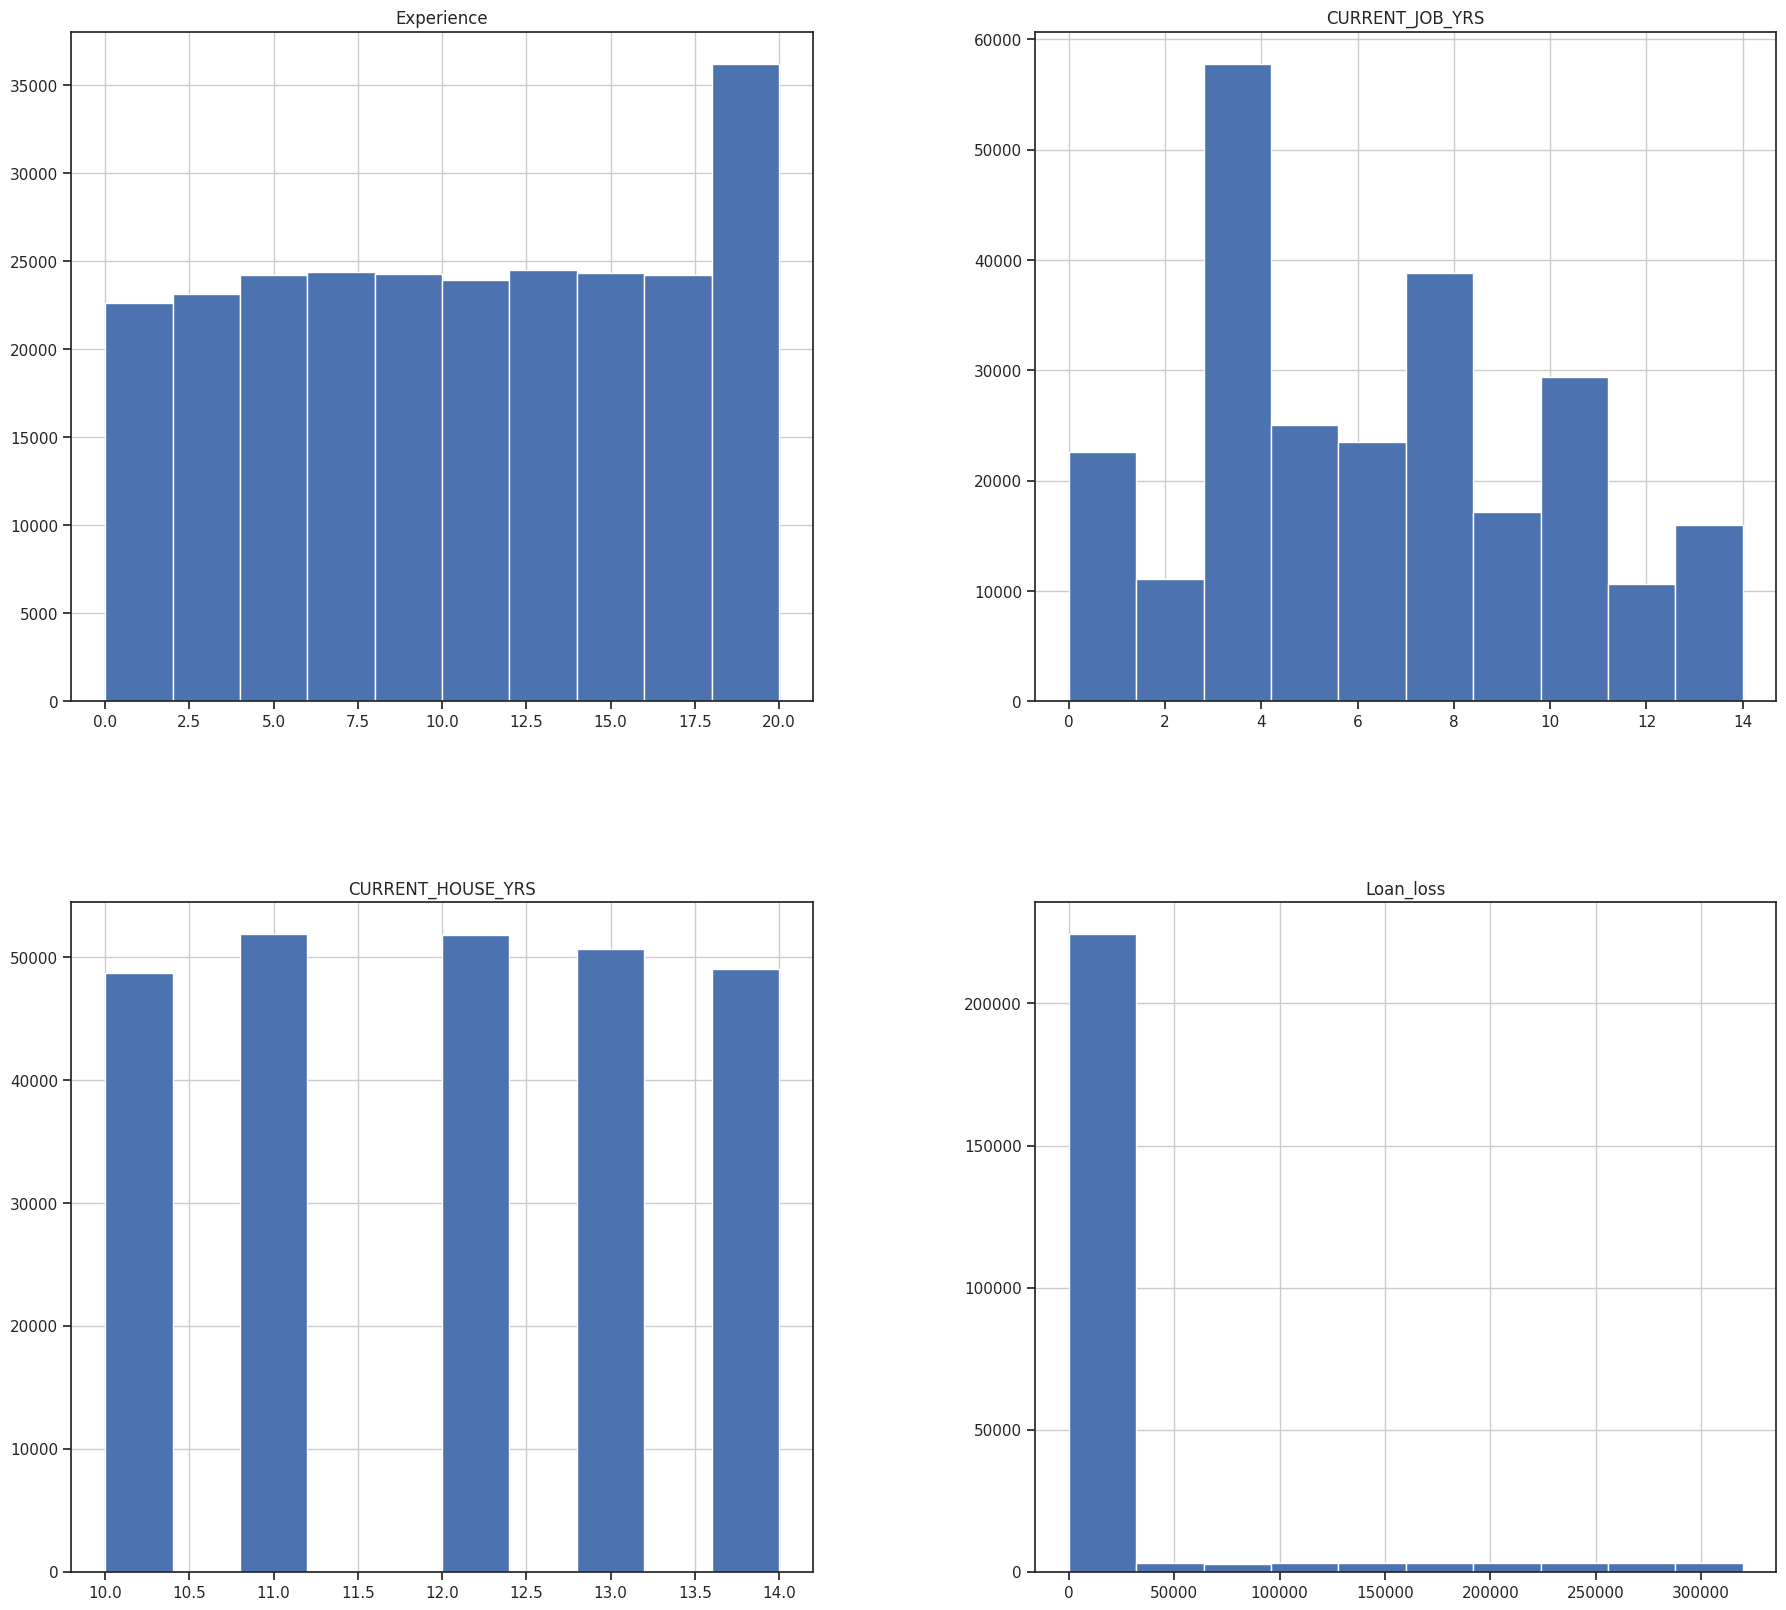

In [217]:
#we check the data distribution.

# List of columns to exclude from the histogram
exclude_columns = ['Risk_Flag', 'Latitude', 'Longitude', 'Age', 'Income_SGD']

# Select columns for the histogram (exclude the specified columns)
columns_to_plot = [col for col in df_bank.columns if col not in exclude_columns]

# Create histograms for the selected columns
df_bank[columns_to_plot].hist(figsize=(22, 20))
plt.show()


In [218]:
#nothing is abnormal in the plots.

**Sub-Pair Plots and investigations: Now let us look at 'Red Flags vs district' and their interdependencies: let us analyse the following plots to understand which district has more defaults in the past**

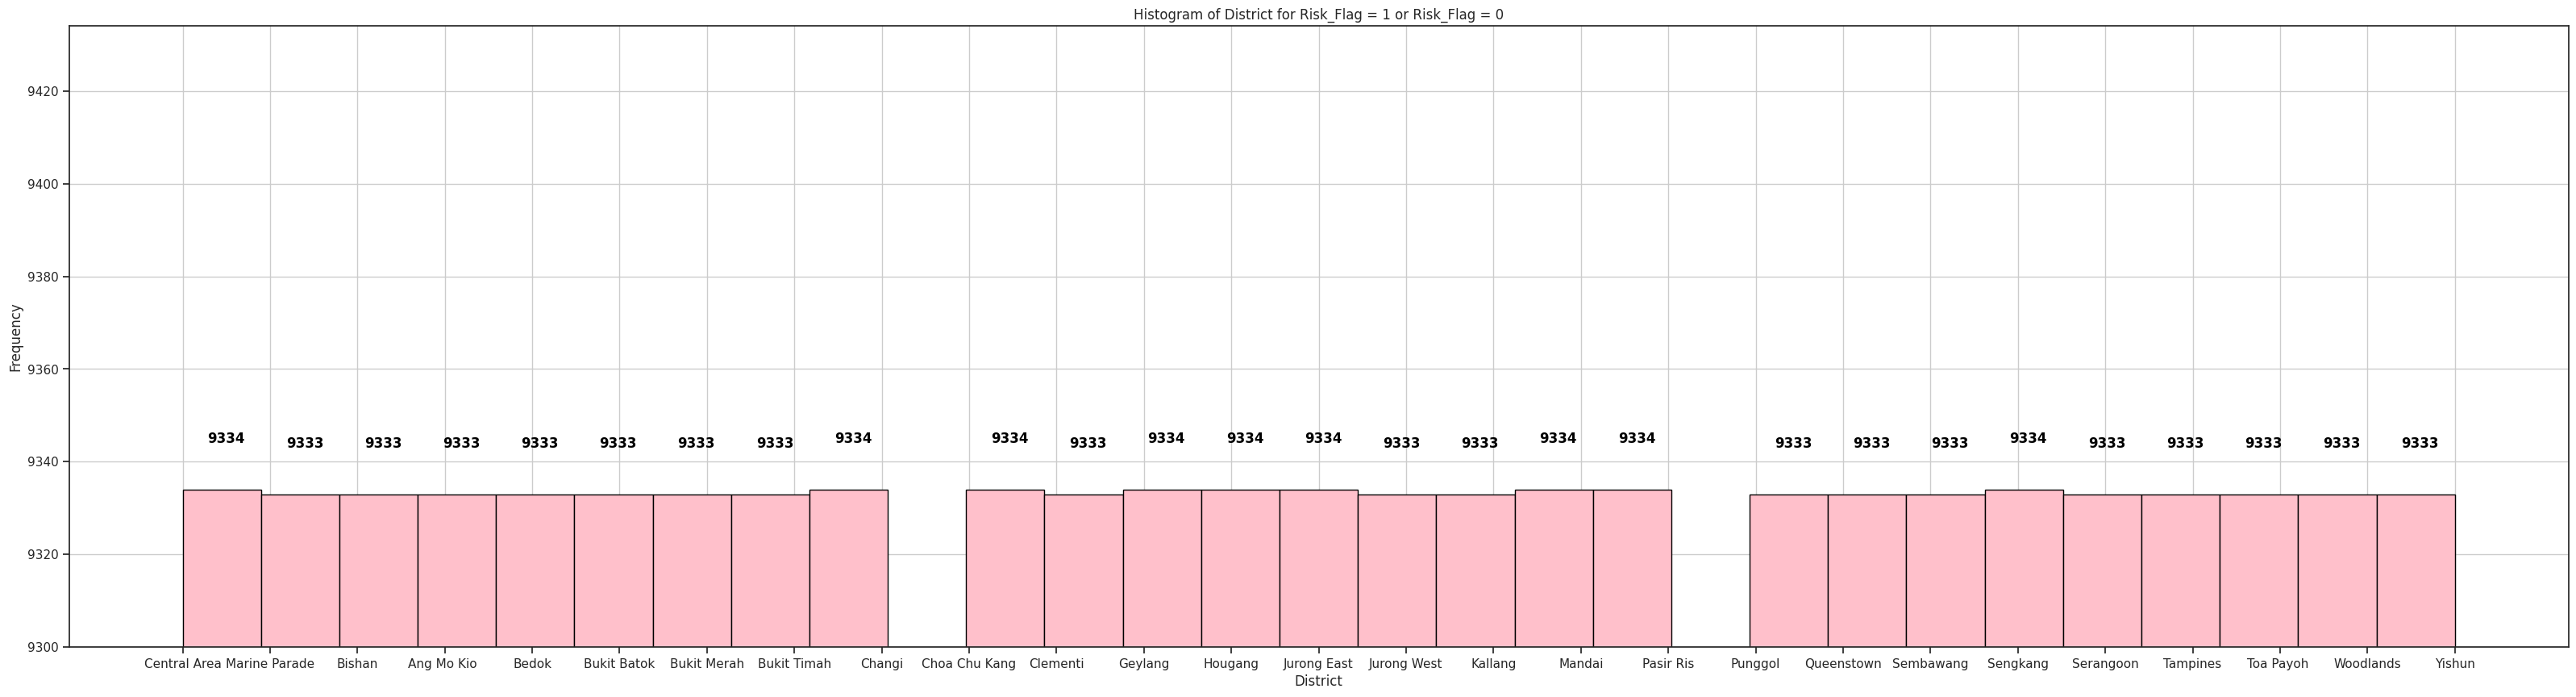

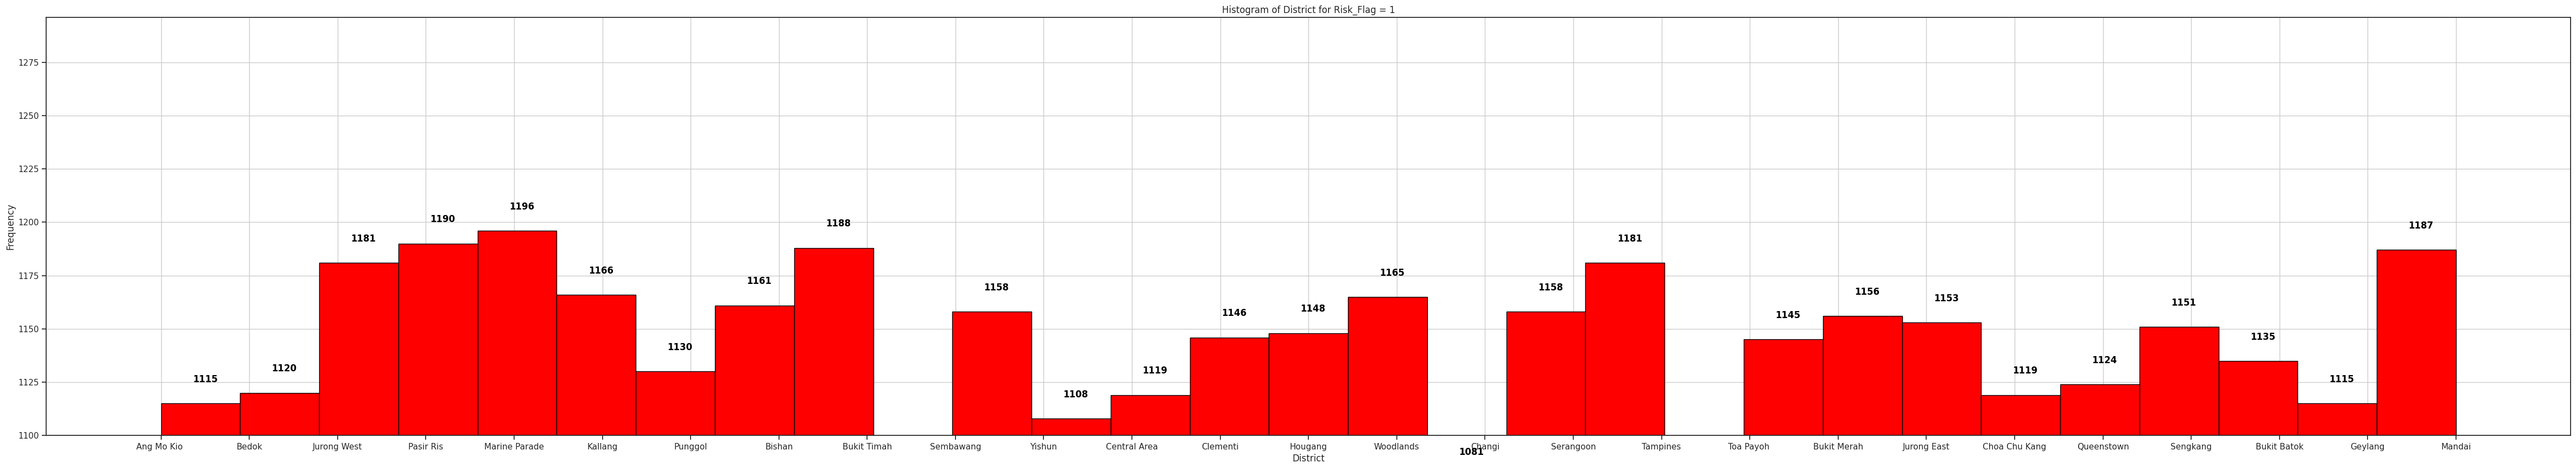

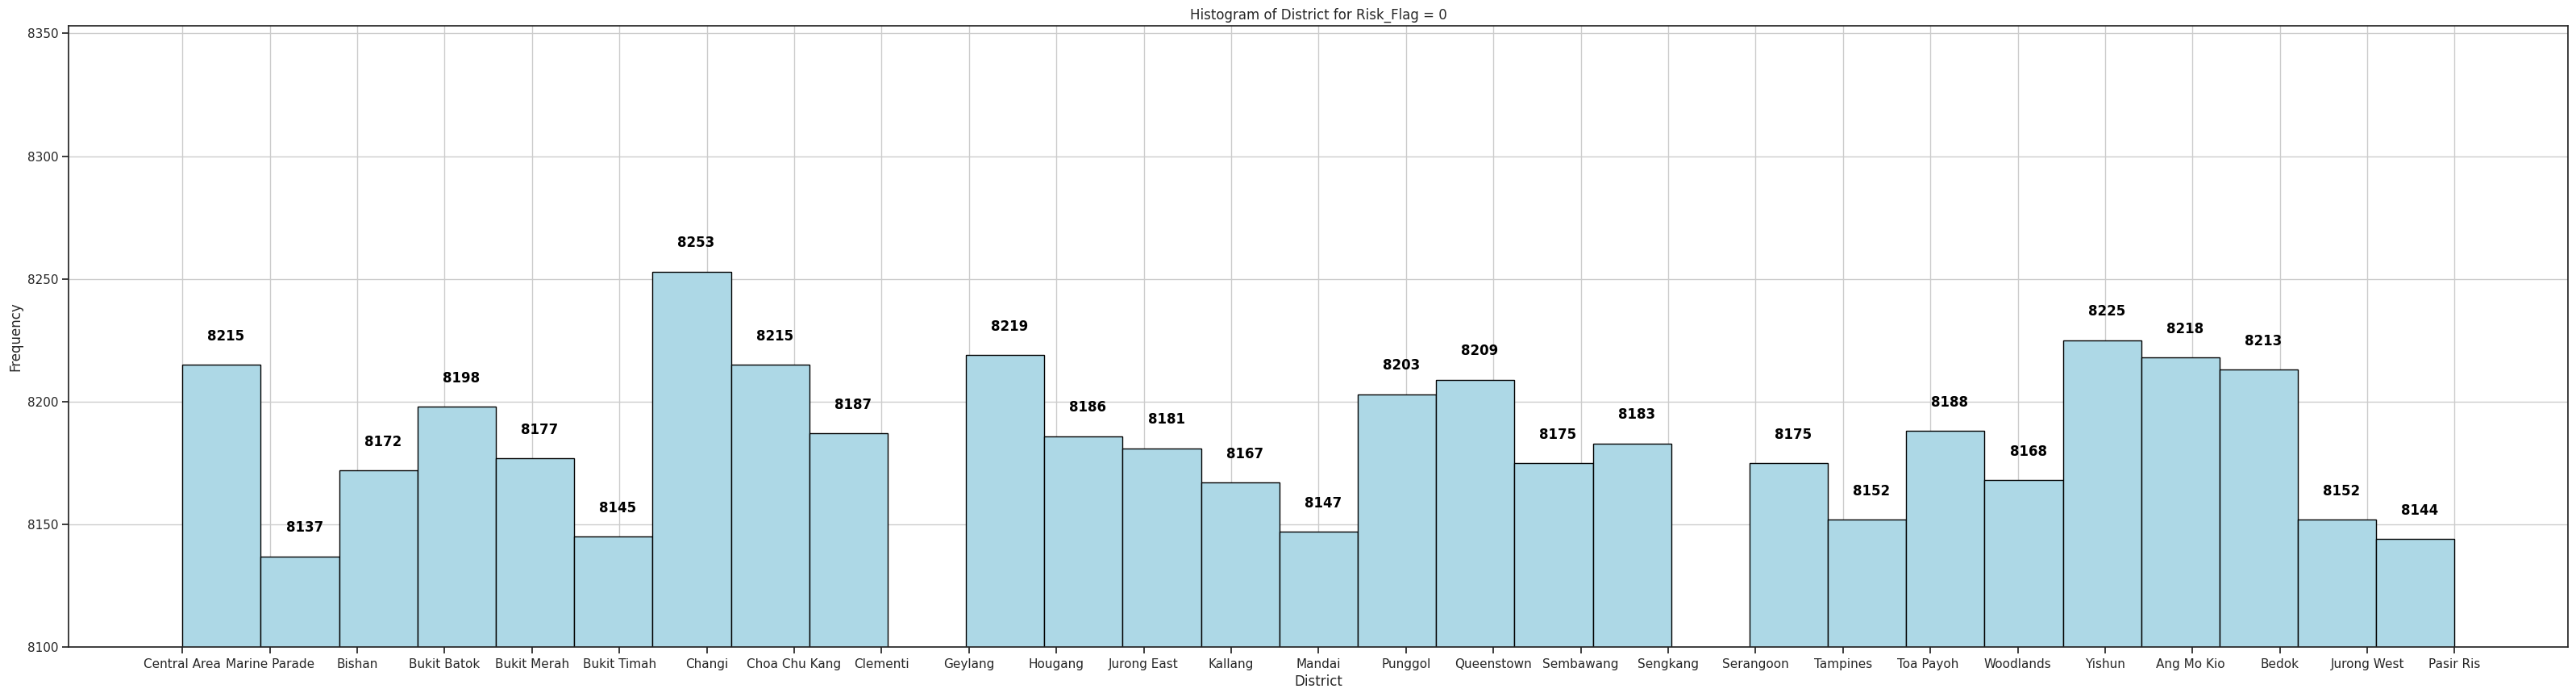

In [219]:
# Create a histogram for the 'District' column with pink bars and 29 bins for Risk_Flag == 1 or Risk_Flag == 0
plt.figure(figsize=(40, 10))
n0, bins0, patches0 = plt.hist(df_bank[df_bank['Risk_Flag'].isin([0, 1])]['District'], bins=29, edgecolor='black', color='pink')

# Calculate the frequency of each bin
bin_freq0 = [int(p.get_height()) for p in patches0]

# Set the title, labels, and grid for the first plot
plt.title('Histogram of District for Risk_Flag = 1 or Risk_Flag = 0')
plt.xlabel('District')
plt.ylabel('Frequency')
plt.grid(True)

# Set the y-axis limits for the first plot (above 9300)
plt.ylim(9300, max(bin_freq0) + 100)  # Adjust the upper limit as needed

# Add frequencies above the bins for the first plot
for bin, freq in zip(bins0, bin_freq0):
    if freq > 0:
        plt.text(bin + 0.5, freq + 10, str(int(freq)), ha='center', fontsize=12, weight='bold', color='black')

plt.show()

# Create a histogram for the 'District' column with red bars and 29 bins for Risk_Flag == 1
plt.figure(figsize=(60, 10))
n1, bins1, patches1 = plt.hist(df_bank[df_bank['Risk_Flag'] == 1]['District'], bins=29, edgecolor='black', color='red')

# Calculate the frequency of each bin
bin_freq1 = [int(p.get_height()) for p in patches1]

# Set the title, labels, and grid for the second plot
plt.title('Histogram of District for Risk_Flag = 1')
plt.xlabel('District')
plt.ylabel('Frequency')
plt.grid(True)

# Set the y-axis limits for the second plot (above 1100)
plt.ylim(1100, max(bin_freq1) + 100)  # Adjust the upper limit as needed

# Add frequencies above the bins for the second plot
for bin, freq in zip(bins1, bin_freq1):
    if freq > 0:
        plt.text(bin + 0.5, freq + 10, str(int(freq)), ha='center', fontsize=12, weight='bold', color='black')

plt.show()

# Create a histogram for the 'District' column with light blue bars and 29 bins for Risk_Flag == 0
plt.figure(figsize=(40, 10))
n2, bins2, patches2 = plt.hist(df_bank[df_bank['Risk_Flag'] == 0]['District'], bins=29, edgecolor='black', color='lightblue')

# Calculate the frequency of each bin
bin_freq2 = [int(p.get_height()) for p in patches2]

# Set the title, labels, and grid for the third plot
plt.title('Histogram of District for Risk_Flag = 0')
plt.xlabel('District')
plt.ylabel('Frequency')
plt.grid(True)

# Set the y-axis limits for the third plot (above 8100)
plt.ylim(8100, max(bin_freq2) + 100)  # Adjust the upper limit as needed

# Add frequencies above the bins for the third plot
for bin, freq in zip(bins2, bin_freq2):
    if freq > 0:
        plt.text(bin + 0.5, freq + 10, str(int(freq)), ha='center', fontsize=12, weight='bold', color='black')

plt.show()




we observe some difference in applicants exist for each district as indicated by first plot above.

 In the next plot we see that some districts have higher rejections (Risk_Flag==1), while last plot shows more or less all districts have similar loan acceptance (Risk_Flag==0).

In [220]:
# let us rank the districts based on Defaults

In [221]:
# Filter rows where 'Risk_Flag' is equal to 1
filtered_df1 = df_bank[df_bank['Risk_Flag'] == 1]


# Group the filtered DataFrame by 'District' and count the occurrences
grouped_df = filtered_df1.groupby('District').size().reset_index(name='Loan Defaults')


# Sort the grouped DataFrame by 'Count' column in descending order
sorted_df = grouped_df.sort_values(by='Loan Defaults', ascending=False)

# Print the sorted DataFrame
print(sorted_df)


         District  Loan Defaults
16  Marine Parade           1196
17      Pasir Ris           1190
5     Bukit Timah           1188
15         Mandai           1187
13    Jurong West           1181
23       Tampines           1181
14        Kallang           1166
25      Woodlands           1165
2          Bishan           1161
20      Sembawang           1158
22      Serangoon           1158
4     Bukit Merah           1156
12    Jurong East           1153
21       Sengkang           1151
11        Hougang           1148
9        Clementi           1146
24     Toa Payoh            1145
3     Bukit Batok           1135
18        Punggol           1130
19     Queenstown           1124
1           Bedok           1120
8   Choa Chu Kang           1119
6    Central Area           1119
0     Ang Mo Kio            1115
10        Geylang           1115
26         Yishun           1108
7          Changi           1081


# Summary of number of customer who Settled their loans and those who Defaulted  per district based on Risk_Flag =0 or 1  

In [222]:
# Filter rows where 'Risk_Flag' is equal to 1
filtered_df1 = df_bank[df_bank['Risk_Flag'] == 1]

# Group the filtered DataFrame by 'District' and count the occurrences
grouped_df1 = filtered_df1.groupby('District').size().reset_index(name='Loan Defaults')

# Filter rows where 'Risk_Flag' is equal to 0
filtered_df0 = df_bank[df_bank['Risk_Flag'] == 0]

# Group the filtered DataFrame by 'District' and count the occurrences
grouped_df0 = filtered_df0.groupby('District').size().reset_index(name='Loan Settled')

# Create the final DataFrame and assign values
grouped_df = grouped_df0[['District', 'Loan Settled']]
grouped_df['Loan Defaults'] = grouped_df1['Loan Defaults']

# Print the final DataFrame
print(grouped_df)



         District  Loan Settled  Loan Defaults
0     Ang Mo Kio           8218           1115
1           Bedok          8213           1120
2          Bishan          8172           1161
3     Bukit Batok          8198           1135
4     Bukit Merah          8177           1156
5     Bukit Timah          8145           1188
6    Central Area          8215           1119
7          Changi          8253           1081
8   Choa Chu Kang          8215           1119
9        Clementi          8187           1146
10        Geylang          8219           1115
11        Hougang          8186           1148
12    Jurong East          8181           1153
13    Jurong West          8152           1181
14        Kallang          8167           1166
15         Mandai          8147           1187
16  Marine Parade          8137           1196
17      Pasir Ris          8144           1190
18        Punggol          8203           1130
19     Queenstown          8209           1124
20      Semba

# Summary of % of Loan Defaults per district

In [223]:
# Calculate the percentage of loan defaults per district
grouped_df['Percentage of Loan Defaults'] = ((grouped_df['Loan Defaults'] / (grouped_df['Loan Defaults'] + grouped_df['Loan Settled'])) * 100).round(3)

# Print the result
print(grouped_df[['District', 'Percentage of Loan Defaults']])

         District  Percentage of Loan Defaults
0     Ang Mo Kio                        11.947
1           Bedok                       12.000
2          Bishan                       12.440
3     Bukit Batok                       12.161
4     Bukit Merah                       12.386
5     Bukit Timah                       12.729
6    Central Area                       11.988
7          Changi                       11.581
8   Choa Chu Kang                       11.988
9        Clementi                       12.279
10        Geylang                       11.946
11        Hougang                       12.299
12    Jurong East                       12.353
13    Jurong West                       12.654
14        Kallang                       12.493
15         Mandai                       12.717
16  Marine Parade                       12.815
17      Pasir Ris                       12.749
18        Punggol                       12.108
19     Queenstown                       12.043
20      Semba

#Summary of Loan Loss incured due to loan Defaults per district

In [224]:
Total_loss = df_bank['Loan_loss'].sum()
Total_loss

4932935377.183999

In [ ]:
# Group by 'District' and calculate the sum of 'Loan_loss'
loan_loss_by_district = df_bank.groupby('District')['Loan_loss'].sum()
Millions= loan_loss_by_district / 10**6


In [226]:
Millions.head(5)

District
Ang Mo Kio     172.634029
Bedok          175.200575
Bishan         182.402064
Bukit Batok    186.236876
Bukit Merah    188.076075
Name: Loan_loss, dtype: float64

In [227]:
Millions_df = Millions.reset_index()

# Rename the columns
Millions_df.columns = ['District', 'Loss (Million SGD)']

# Print the resulting DataFrame
print(Millions_df)


         District  Loss (Million SGD)
0     Ang Mo Kio           172.634029
1           Bedok          175.200575
2          Bishan          182.402064
3     Bukit Batok          186.236876
4     Bukit Merah          188.076075
5     Bukit Timah          188.703734
6    Central Area          181.594491
7          Changi          169.091406
8   Choa Chu Kang          176.602787
9        Clementi          179.739668
10        Geylang          176.981127
11        Hougang          183.819453
12    Jurong East          186.325935
13    Jurong West          187.671370
14        Kallang          186.899529
15         Mandai          188.513827
16  Marine Parade          195.643371
17      Pasir Ris          191.941302
18        Punggol          181.626339
19     Queenstown          181.200069
20      Sembawang          181.691734
21       Sengkang          186.633241
22      Serangoon          181.270097
23       Tampines          187.800053
24     Toa Payoh           181.262258
25      Wood

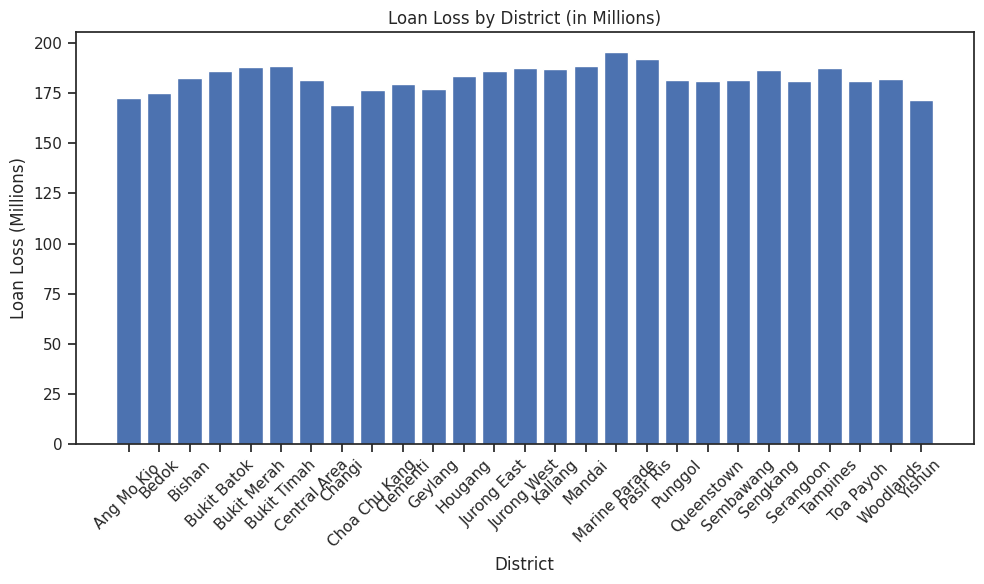

In [228]:

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(Millions.index, Millions.values)

# Adding labels and title
plt.xlabel('District')
plt.ylabel('Loan Loss (Millions)')
plt.title('Loan Loss by District (in Millions)')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Ensures labels are not cut off
plt.show()


In [229]:
grouped_df.head(3)

District  Loan Settled  Loan Defaults  Percentage of Loan Defaults
0  Ang Mo Kio           8218           1115                       11.947
1        Bedok          8213           1120                       12.000
2       Bishan          8172           1161                       12.440

In [230]:
Millions_df.head(3)

District  Loss (Million SGD)
0  Ang Mo Kio           172.634029
1        Bedok          175.200575
2       Bishan          182.402064

In [231]:
grouped_df['Loss (Million SGD)']=Millions_df['Loss (Million SGD)']

In [232]:
#Let us look at these districts and their locations on the worldmap

In [233]:
#Latitude-longitude, showing 5000 sample data points on the world map

In [234]:
# Create a Folium map centered at a specific location (e.g., Singapore)
m = folium.Map(location=[1.3521, 103.8198], zoom_start=10)  # Adjust latitude and longitude and zoom level as needed

# Create a feature group for the data points
data_points = folium.FeatureGroup(name='Data Points')

# Merge the sorted_df DataFrame with the df_lalo DataFrame using the 'District' column
merged_df = pd.merge(grouped_df, df_lalo, on='District')

# Plot data points on the map using latitude and longitude columns from the merged DataFrame
for index, row in merged_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,  # Adjust the size of the markers
        color='#03DAC5',  # Specify a color for the markers
        fill=True,
        fill_color='#03DAC5',
        fill_opacity=0.6,
        popup=f"District: {row['District']} | Percentage of Loan Defaults: {row['Percentage of Loan Defaults']} | Loan Defaulted BY: {row['Loan Defaults']} | Loss (Million SGD) BY: {row['Loss (Million SGD)']}",  # Display additional information in a popup
    ).add_to(data_points)

# Add the feature group to the map
data_points.add_to(m)

# Add a layer control to toggle the data points
folium.LayerControl().add_to(m)

# Display the map
m





In [235]:
# the same content is produced in a HTML file, whose link is attached.

link: https://raw.githubusercontent.com/venuannamdas/Singapore_Bank_Loan_Project/master/DataScience_AI_Banking_Project.html


https://raw.githack.com/venuannamdas/Singapore_Bank_Loan_Project/master/DataScience_AI_Banking_Project.html


In [236]:
# Create the map at a specific location below Singapore
m = folium.Map(location=[1.3521, 103.8198], zoom_start=10)
# Create a feature group for the data points with pink markers
data_points_pink = folium.FeatureGroup(name='Data Points (Pink)')

# Create a feature group for the data points with blue markers
data_points_blue = folium.FeatureGroup(name='Data Points (Blue)')

# Merge the sorted_df DataFrame with the df_lalo DataFrame using the 'District' column
merged_df = pd.merge(grouped_df, df_lalo, on='District')

# Function to generate HTML code for the popup with custom width
def custom_popup_html(district, defaultspercent, defaults, loss):
    return f"""
    <p><h3>Shantanu Bank</h3>
    </p>
    <div style="width: 300px;">
        <h5>Singapore District: {district} </h5>
        <p><strong>Percentage of Loan Defaults:</strong> {defaultspercent}
        <br><strong>Loan Defaulted by:</strong> {defaults}
        <br><strong>Loss (Million SGD):</strong> {loss}
        <br>(10 Years: 2012-2022) </br> </p>
        <i>Designed by Venu Gopal Madhav Annamdas, PhD</i>
        <br><i>Disclaimer: only for Educational Purpose- Data Science & AI Project'</i></br></p>
    </div>
    """

# Function to generate JavaScript code for mouseover and mouseout events
def custom_js_code(district, defaultspercent, defaults, loss):
    return f"""
    function showPopup(district, defaultspercent, defaults, loss) {{
        var popup = L.popup().setContent(`
    <p><h3>Shantanu Bank - Singapore</h3>
    </p>
            <div style="width: 300px;">
                <h5>Singapore District: {district}</h5>
                <p><strong>Percentage of Loan Defaults:</strong> {defaultspercent}
                <br><strong>Loan Defaulted by:</strong> {defaults}
                <br><strong>Loss (Million SGD):</strong> {loss}
                <br>(10 Years: 2012-2022) </br>   </p>
                <i>Designed by Venu Gopal Madhav Annamdas, PhD</i>
                <br><i>Disclaimer: only for Educational Purpose- Data Science & AI Project'</i></br></p>
            </div>
        `);
        popup.setLatLng(mymap.getCenter()).openOn(mymap);
    }}
    function hidePopup() {{
        mymap.closePopup();
    }}
    """

# Plot data points on the map using latitude and longitude columns from the merged DataFrame
for index, row in merged_df.iterrows():
    # Pink markers for Loan Defaults
    pink_popup = custom_popup_html(row['District'], row['Percentage of Loan Defaults'], row['Loan Defaults'], row['Loss (Million SGD)'])
    pink_marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=folium.Icon(color='pink'),  # Specify a pink marker
        popup=folium.Popup(pink_popup, max_width=300),  # Use folium.Popup to set max_width
    )
    pink_marker.add_to(data_points_pink)

    # Blue markers for Loan Defaults (you can modify this part to display Loan Approved)
    blue_popup = custom_popup_html(row['District'], row['Percentage of Loan Defaults'], row['Loan Defaults'], row['Loss (Million SGD)'])
    blue_marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=folium.Icon(color='blue'),  # Specify a blue marker
        popup=folium.Popup(blue_popup, max_width=300),  # Use folium.Popup to set max_width
    )
    blue_marker.add_to(data_points_blue)

# Add the feature groups to the map
data_points_pink.add_to(m)
data_points_blue.add_to(m)

# Add a layer control to toggle the data points
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('DataScience_AI_Banking_Project.html')



Who defaulted in the past?
what type of professionals defaulted?#   
Answer: we look at professions first (Risk_Flag =0 & 1) and then filter for  'Risk_Flag'=1

Total categories in Profession: 51


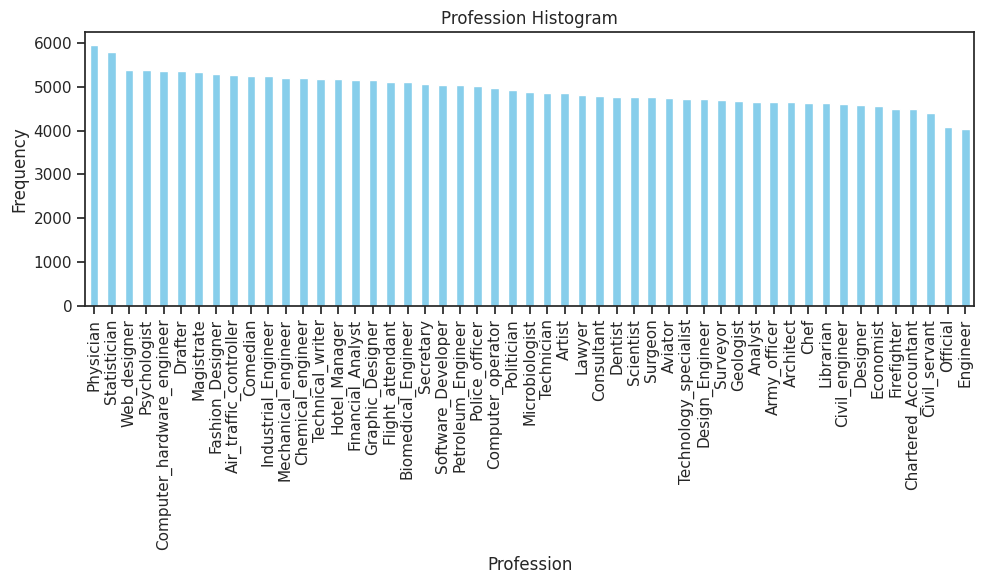

In [237]:
# unique categories in the "Profession" column (Risk_Flag ==0 & 1)
total_categories = len(df_bank["Profession"].unique())

# Print the total categories
print("Total categories in Profession:", total_categories)

# Create a histogram plot for the "Profession" column
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
df_bank["Profession"].value_counts().plot(kind='bar', color='skyblue')
plt.title("Profession Histogram")
plt.xlabel("Profession")
plt.ylabel("Frequency")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [238]:
df_defaulted_professions = df_bank.loc[df_bank['Risk_Flag'] == 1, 'Profession']
df_defaulted_professions.value_counts()

Police_officer                826
Software_Developer            750
Air_traffic_controller        715
Surveyor                      714
Physician                     710
Army_officer                  709
Hotel_Manager                 701
Technical_writer              697
Chartered_Accountant          690
Scientist                     690
Computer_hardware_engineer    690
Geologist                     674
Statistician                  671
Secretary                     660
Psychologist                  657
Biomedical_Engineer           654
Magistrate                    643
Aviator                       642
Flight_attendant              634
Comedian                      629
Civil_engineer                627
Lawyer                        624
Technician                    624
Computer_operator             619
Fashion_Designer              612
Firefighter                   612
Architect                     611
Microbiologist                607
Drafter                       605
Consultant    

In [239]:
df_defaulted_professions.head(5)

3      Software_Developer
4           Civil_servant
14       Technical_writer
17             Politician
28    Biomedical_Engineer
Name: Profession, dtype: object

In [240]:
#Creating a Dataframe that stores Profession details of Loan defaulters (i.e for 'Risk_Flag =1)

In [241]:
# Filter the DataFrame to include only rows where 'Risk_Flag' is equal to 1
df_defaulted = df_bank[df_bank['Risk_Flag'] == 1]

# Group the filtered DataFrame by 'District' and count the occurrences of each profession
district_profession_counts = df_defaulted.groupby('District')['Profession'].value_counts()

# Reset the index to make it a DataFrame
district_profession_counts = district_profession_counts.reset_index(name='Count')


# Print the resulting DataFrame
print(district_profession_counts)


         District              Profession  Count
0     Ang Mo Kio       Software_Developer     38
1     Ang Mo Kio           Police_officer     36
2     Ang Mo Kio         Flight_attendant     35
3     Ang Mo Kio                   Lawyer     34
4     Ang Mo Kio   Air_traffic_controller     29
...           ...                     ...    ...
1372       Yishun            Web_designer     15
1373       Yishun          Civil_engineer     14
1374       Yishun               Economist     14
1375       Yishun                    Chef     11
1376       Yishun     Industrial_Engineer     11

[1377 rows x 3 columns]


In [242]:
# Pivot the data to create separate columns for each profession and its count
pivot_df = district_profession_counts.pivot_table(index='District', columns='Profession', values='Count', fill_value=0)

# Reset the index to make 'District' a regular column
pivot_df.reset_index(inplace=True)

# Rename the columns for clarity (optional)
pivot_df.columns.name = None

# Print the resulting DataFrame
print(pivot_df)



         District  Air_traffic_controller  Analyst  Architect  Army_officer  \
0     Ang Mo Kio                       29       19         24            19   
1           Bedok                      30       14         20            25   
2          Bishan                      31       19         10            27   
3     Bukit Batok                      17       19         22            27   
4     Bukit Merah                      21       25         24            26   
5     Bukit Timah                      31       19         25            21   
6    Central Area                      21       18         21            30   
7          Changi                      24       17         21            35   
8   Choa Chu Kang                      19       21         17            26   
9        Clementi                      28       25         27            16   
10        Geylang                      28       23         24            26   
11        Hougang                      26       20  

Additional Information: Details of Loan Defaulters, for each District based on Profession, is saved in the HTML file. Link is provided for viewing.

In [243]:
colour='https://raw.githubusercontent.com/venuannamdas/Singapore_Bank_Loan_Project/master/profession_colors.csv'

In [244]:
df_colour = pd.read_csv(colour)

In [245]:
df_colour.head(5)

Profession   Color
0          Police_officer   green
1      Software_Developer    blue
2  Air_traffic_controller     red
3                Surveyor  purple
4               Physician  orange

In [246]:
# Create a map centered around Singapore
singapore_map = folium.Map(location=[1.3521, 103.8198], zoom_start=12)

# Add a note marker to the map with a white background
note_content = (
    "<div style='width: 300px; background-color: white; padding: 10px;'>"
    "<h3>Note</h3>"
    "<h5>Bank Reported a Total loss of S$ 4933 millions over a period of 10 years (2012-2022) due to bad loans across singapore.</h5>"
    "<p>This map shows loan default details by profession. Click from Top to bottom on these coloured bars to view different loan defaulters by profession"
    "<br>(Disclaimer: only for Educational Purpose- Data Science & AI Project). Designed by Venu Gopal Madhav Annamdas, PhD. </h5></p>"
    "</div>"
)
note_marker = folium.Marker(
    location=[1.26, 103.81],  # Adjust the coordinates for the note marker
    icon=folium.DivIcon(html=note_content, icon_size=(300, 100)),
)
note_marker.add_to(singapore_map)

# Create a profession to color mapping using df_colour DataFrame
profession_colors_dict = df_colour.set_index('Profession')['Color'].to_dict()

# Define bar width and height
bar_width = 0.005  # Adjust the width as needed
max_bar_height = 0.05  # Maximum bar height (adjust as needed)

# Add bars for each district based on profession counts
for _, row in district_profession_counts.iterrows():
    district = row['District']
    profession = row['Profession']
    count = row['Count']

    # Get the color based on the profession from the mapping
    color = profession_colors_dict.get(profession, 'gray')  # Default to gray if profession is not found

    # Calculate the bar height based on the count
    bar_height = max_bar_height * (count / district_profession_counts['Count'].max())

    # Get the latitude and longitude for the district
    district_lat = df_lalo[df_lalo['District'] == district]['Latitude'].values[0]
    district_lon = df_lalo[df_lalo['District'] == district]['Longitude'].values[0]

    # Create a custom popup content
    popup_content = (
        "<p><h3>Shantanu Bank - Singapore</h3></p>"
        f"<h5>District: {district}</h5>"
        f"<br> Loan Defaulted by: {count} Customers (Profession: {profession})"
        "<br><br><i>Designed by Venu Gopal Madhav Annamdas, PhD <br>"
    )

    # Create a rectangle (bar) using folium.Rectangle
    folium.Rectangle(
        bounds=[
            [district_lat, district_lon],
            [district_lat + bar_height, district_lon + bar_width],
        ],
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(popup_content, max_width=300),
    ).add_to(singapore_map)

# Display the map and save it as an HTML file
singapore_map.save('DataScience_AI_Banking_Project_Default_Details.html')





link: https://github.com/venuannamdas/Singapore_Bank_Loan_Project/blob/master/DataScience_AI_Banking_Project_Default_Details.html

https://raw.githack.com/venuannamdas/Singapore_Bank_Loan_Project/master/DataScience_AI_Banking_Project_Default_Details.html

The number of observations which is based on Risk_Flag implies the location/District does not really decide the chances of acceptance or rejection of loan which is more dependent on salaries, age, experience etc. So we NEED NOT consider PROFESSION, DISTRICT, LATITUDE AND LONGITUDE any more. let us drop 'Profession', 'District', ' Latitude', 'Longitude' to reduce complexity in our models.






In [247]:
df_bank.drop(columns=['Profession','District', 'Latitude', 'Longitude'], inplace=True)

#Categorical variables : let us look at other categorical variables.

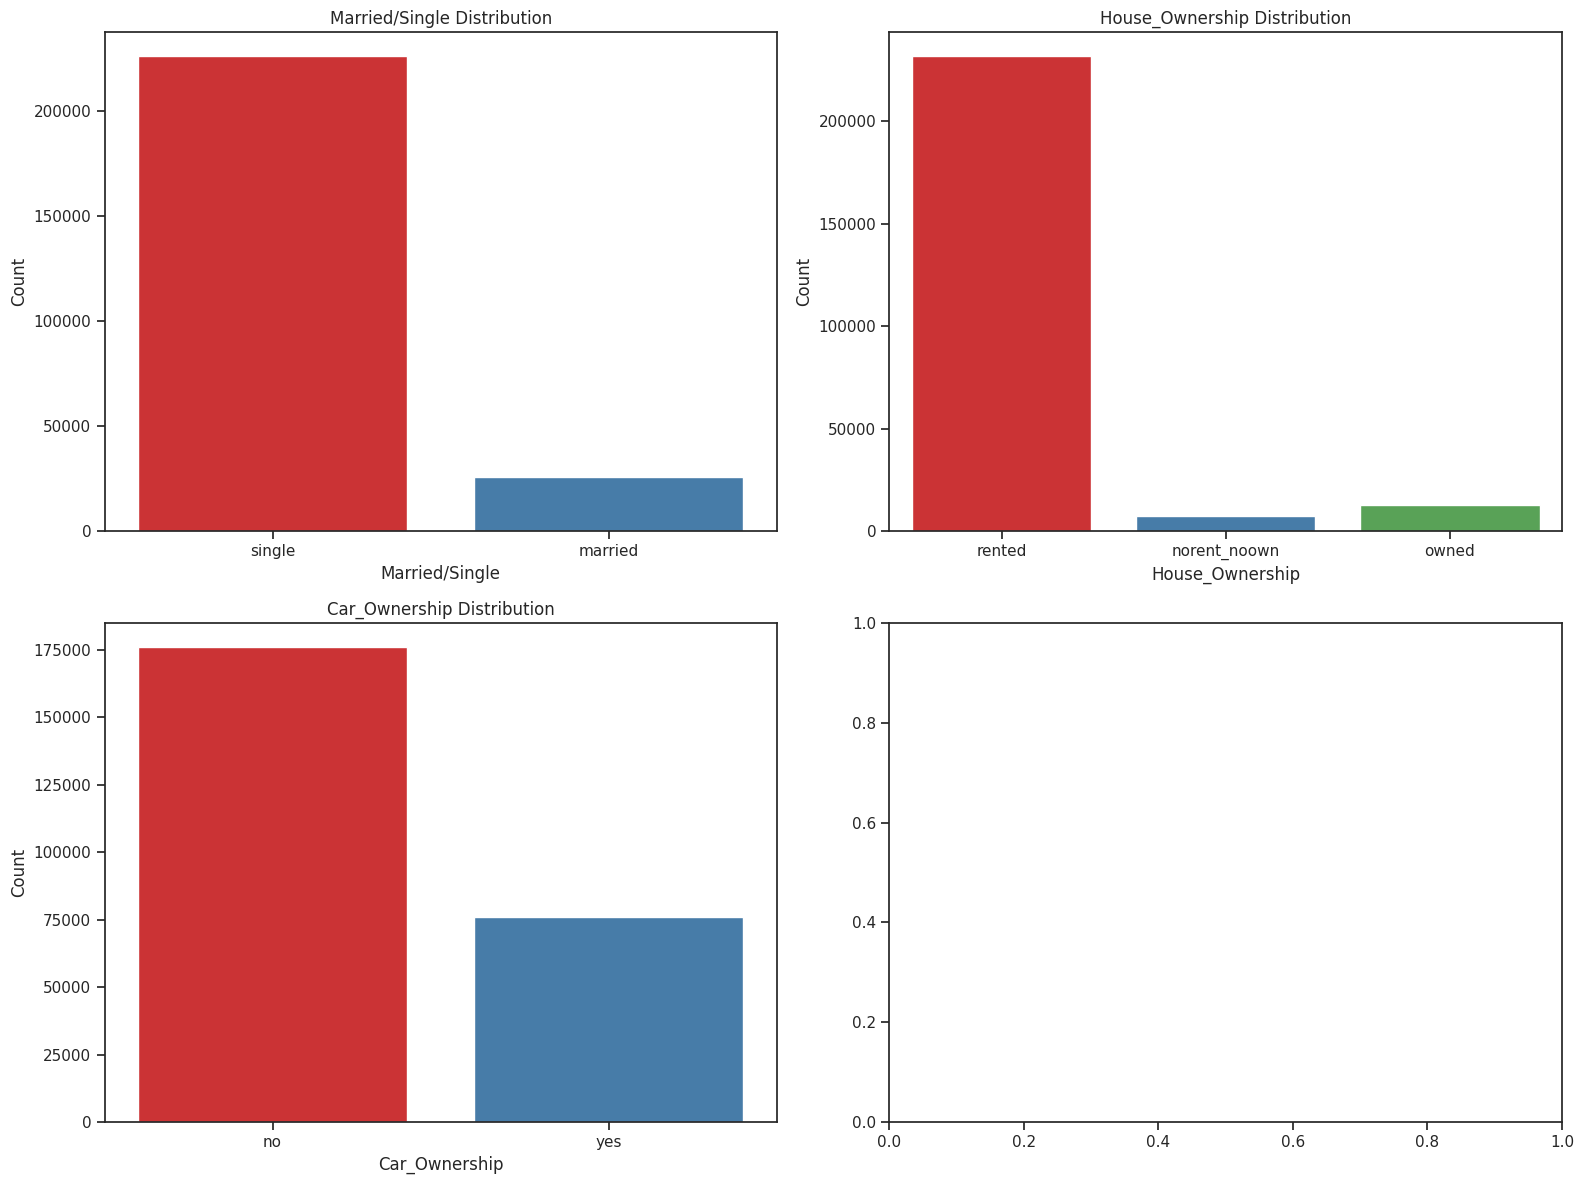

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to plot
categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership']

# Create subplots for the countplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Flatten the axes for iteration
axes = axes.flatten()

# Loop through the categorical columns and create countplots with swapped x and y axes
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df_bank, x=column, palette='Set1', ax=axes[i])
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()



#4.Feature Selection/Engineering:#
Select relevant features that influence loan defaults. Create new features if they add predictive value. Ensure ethical considerations in feature selection to avoid discriminatory practices



Now, we start with understanding the relationship between the different  features with respect to Target Variable (using Risk_Flag)



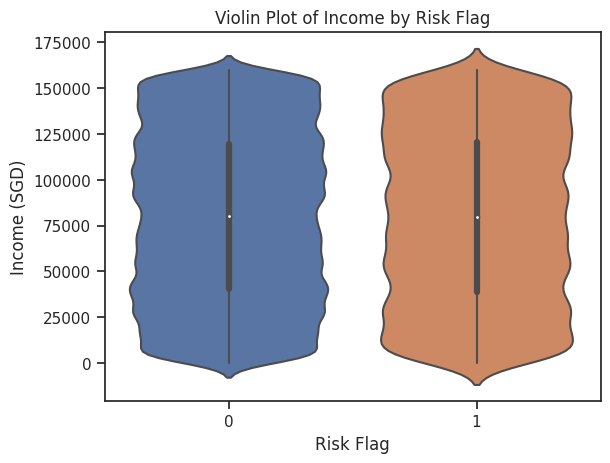

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
sns.violinplot(x="Risk_Flag", y="Income_SGD", data=df_bank)

# Add labels and a title
plt.xlabel("Risk Flag")
plt.ylabel("Income (SGD)")
plt.title("Violin Plot of Income by Risk Flag")

# Show the plot
plt.show()


<Axes: xlabel='Risk_Flag', ylabel='Experience'>

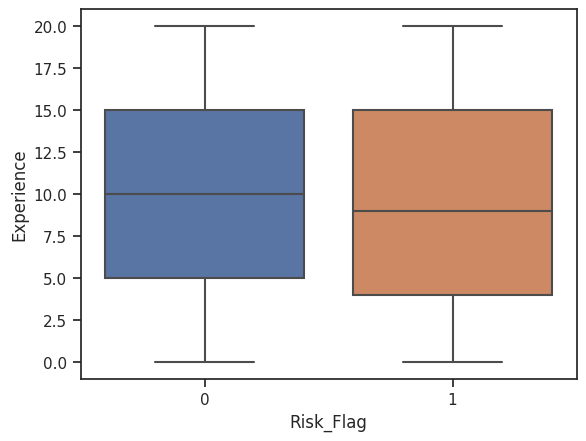

In [250]:
sns.boxplot(x ="Risk_Flag",y="Experience" ,data = df_bank)

<Axes: xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

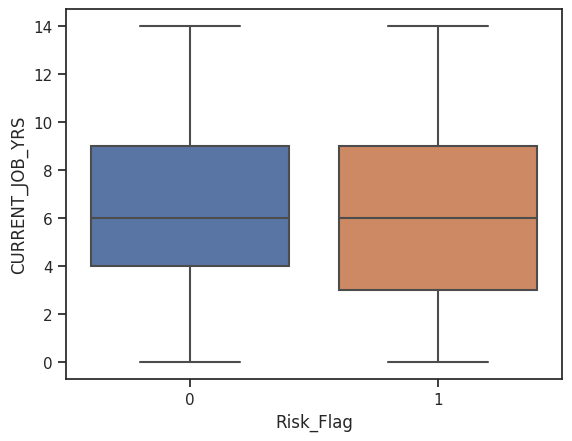

In [251]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_JOB_YRS" ,data = df_bank)

<Axes: xlabel='Risk_Flag', ylabel='CURRENT_HOUSE_YRS'>

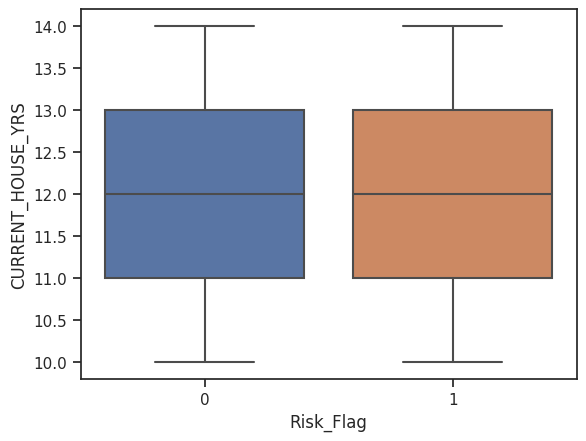

In [252]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_HOUSE_YRS" ,data = df_bank)

<Axes: xlabel='Car_Ownership', ylabel='count'>

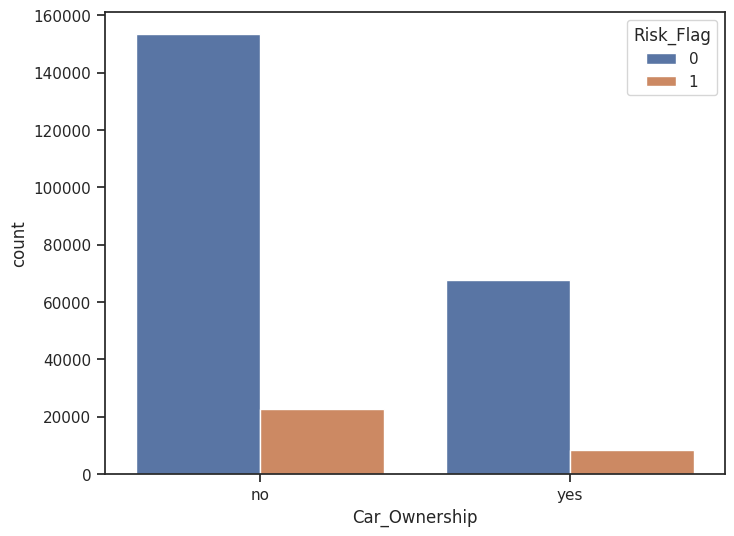

In [253]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='Car_Ownership', hue='Risk_Flag', ax=ax, data=df_bank)

<Axes: xlabel='Married/Single', ylabel='count'>

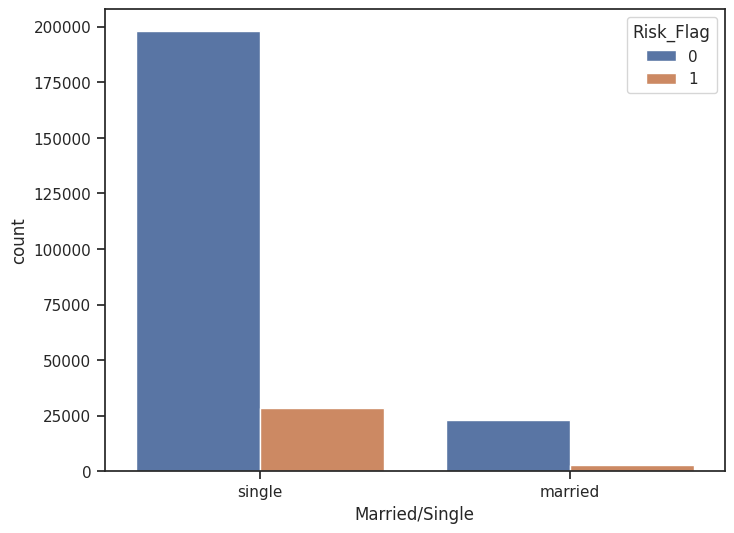

In [254]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='Married/Single', hue='Risk_Flag', data=df_bank)

<Axes: xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

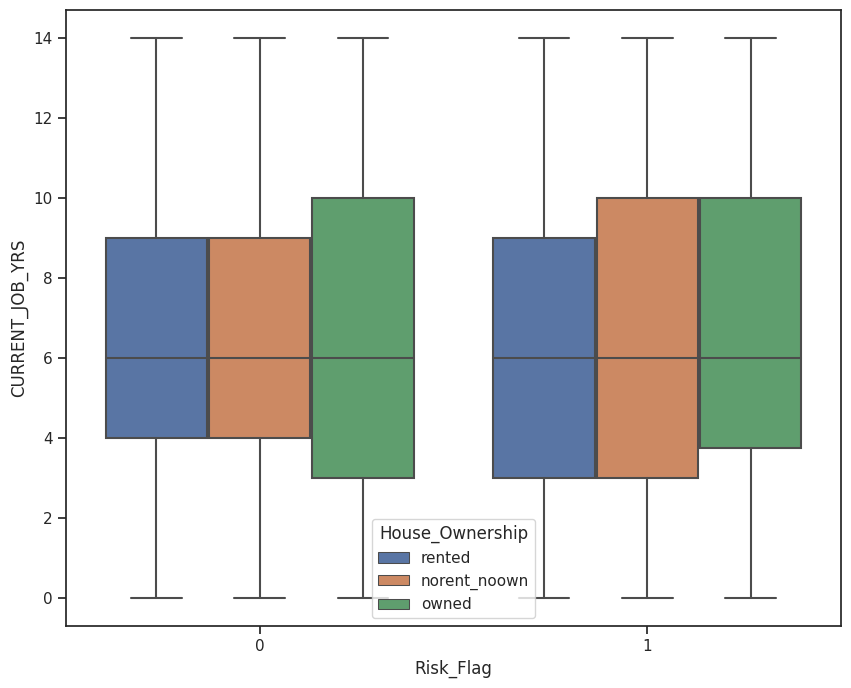

In [255]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "Risk_Flag", y = "CURRENT_JOB_YRS", hue='House_Ownership', data = df_bank)

Convert Categorical variables to label or hot encoded 'numerical variables'

In [256]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of columns to apply label encoding to
columns_to_encode = ['Married/Single', 'Car_Ownership']

# Apply label encoding to the specified columns
for col in columns_to_encode:
    df_bank[col] = label_encoder.fit_transform(df_bank[col])

In [257]:
df_bank[['Married/Single', 'Car_Ownership']]. head(5)

Married/Single  Car_Ownership
0               1              0
1               1              0
2               0              0
3               1              1
4               1              0

In [258]:
onehot_encoder = OneHotEncoder(sparse = False)
df_bank['House_Ownership'] = onehot_encoder.fit_transform(df_bank['House_Ownership'].values.reshape(-1, 1) )

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [259]:
df_bank.columns

Index(['Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag',
       'Income_SGD', 'Loan_loss'],
      dtype='object')

#5.Model Selection and Implementation:#
Choose appropriate machine learning algorithms (e.g., logistic regression, decision trees, random forests, gradient boosting, or neural networks). Consider ensemble methods to improve model performance. Ensure model interpretability and explainability.


 Consider ensemble methods to improve model performance. Ensure model interpretability and explainability.

Data Splitting and Cross-Validation:
Split the dataset into training, validation, and test sets (e.g., 70-15-15 split). Implement cross-validation techniques (e.g., k-fold cross-validation) to ensure robust model evaluation.

Model Training and Tuning:
Train machine learning models on the training dataset. Perform hyperparameter tuning to optimize model performance using techniques like grid search or random search.

Model Evaluation:
Evaluate models using appropriate metrics (e.g., accuracy, precision, recall, F1-score, ROC AUC). Consider the specific business goals and tolerance for false positives and false negatives. Analyze confusion matrices to understand types of prediction errors.

Interpretability and Explainability:
Ensure models provide insights into the factors influencing predictions, especially for regulatory compliance. Use techniques like SHAP values or LIME for model interpretability.

**Data Preparation for Modelling**

Features in X , Target in y

Normalization

splitting

X reprsents dataframe containing all predictor variables/features

y represents target variable/ classified variable

LET US not consider 'LOAN_LOSS' AS IT INDICATES A FACTOR ONLY FOR (Risk_Flag=1), which donot have any values when Risk_Flag=0

In [260]:
X = df_bank[['Age', 'Experience', 'Married/Single', 'House_Ownership','Car_Ownership', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS','Income_SGD']]

In [261]:
y= df_bank['Risk_Flag']

In [262]:
# Create a StandardScaler to normalize the features
scaler = StandardScaler()

# Fit and transform the scaler on the entire dataset
X_normalized = scaler.fit_transform(X)


In [263]:
# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


we know that our target is imbalanced (let us re-visit), More '0's than '1'. that is, we may always get NO loan defaults atleast 88% of the time, which could go against Business Goals. so let us start with Decision Tree Modeling, a easy way for Quick Prototyping which can address our concern. Moreover, it is simple to use. This can serve as a baseline model for more complex algorithms.

In [264]:
y.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [265]:
# % of 0 and 1
per_0 = 100* 221004 /(221004+30996)
per_1 = 100* 30996 /(221004+30996)
print(per_0, per_1)

87.7 12.3


#====================================================#
A) 1. Decision Tree Modeling-class weights adopted
   2. Hyper parameter Tuning -Reduced features -class weights adopted

B) Random Forest-CLASS WEIGHTS adopted

C) Principal Component Analysis without any class weights

D) 1. Ensabled Method -Easy Ensemble for Imbalance class (Decision Tree)   

 2. Ensabled Method -Easy Ensemble for Imbalance class-Hyperparameter tuning
[first--> determine hyperparameter
second--> use it for Random forest application]


#A) 1. Decision Tree Modeling-class weights adopted

In [266]:
# Calculate class weights based on class distribution
total_samples = len(y_train)
class_counts = [len(y_train[y_train == c]) for c in range(len(np.unique(y_train)))]
class_weights = {c: total_samples / (len(np.unique(y_train)) * count) for c, count in enumerate(class_counts)}

In [267]:
X.columns

Index(['Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Income_SGD'],
      dtype='object')

In [268]:
class_weights

{0: 0.5699519951146972, 1: 4.073879481065352}

In [269]:
# Assuming you have feature names and class names
feature_names = ['Age', 'Experience', 'Married/Single', 'House_Ownership','Car_Ownership', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Income_SGD']
class_names = ['0', '1']

Accuracy: 87.89%
Precision: 0.51
Recall: 0.81
F1-score: 0.62
ROC AUC: 0.85
Confusion Matrix:
[[39215  4932]
 [ 1172  5081]]


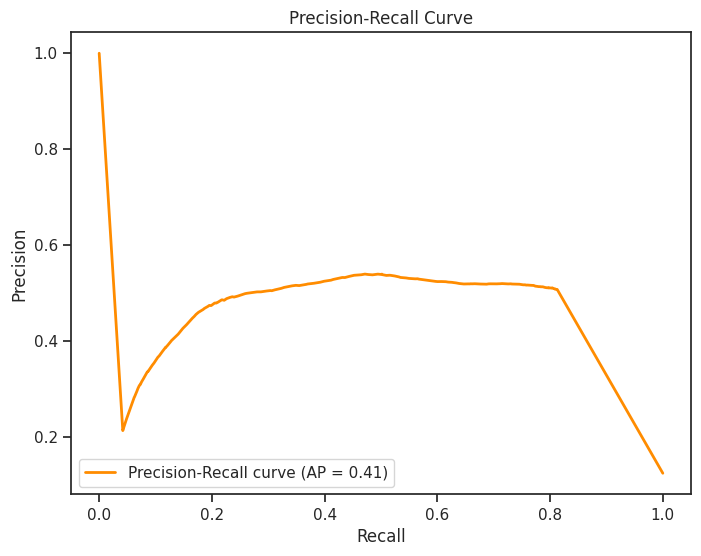

Average Precision: 0.41
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93     44147
           1       0.51      0.81      0.62      6253

    accuracy                           0.88     50400
   macro avg       0.74      0.85      0.78     50400
weighted avg       0.91      0.88      0.89     50400

True Positives (TP): 5081
False Positives (FP): 4932
False Negatives (FN): 1172
True Negatives (TN): 39215


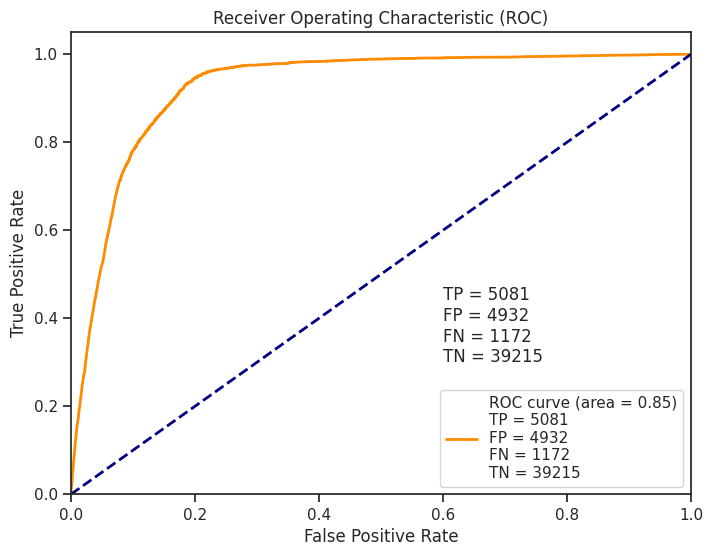

In [271]:
# Creation of Decision Tree Classifier:
clf = DecisionTreeClassifier(random_state=42, class_weight=class_weights, max_depth=None, min_samples_split=2, min_samples_leaf=1)
# Train the classifier
clf.fit(X_train, y_train)
# Make Predictions:
y_pred = clf.predict(X_test)

# Evaluate the Model - accuracy, precision, Recall, ROC AUC, F1 score
accuracy_A1 = accuracy_score(y_test, y_pred)
precision_A1 = precision_score(y_test, y_pred)
recall_A1 = recall_score(y_test, y_pred)
y_prob_A1 = clf.predict_proba(X_test)[:, 1]  # Probability of class 1
roc_auc_A1 = roc_auc_score(y_test, y_prob_A1)
f1_A1_score = f1_score(y_test, y_pred)  # Renamed variable to avoid conflict

print(f"Accuracy: {accuracy_A1 * 100:.2f}%")
print(f"Precision: {precision_A1:.2f}")
print(f"Recall: {recall_A1:.2f}")
print(f"F1-score: {f1_A1_score:.2f}")
print(f"ROC AUC: {roc_auc_A1:.2f}")

# Calculate the confusion matrix
conf_matrix_A1 = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_A1)

# Calculate Precision-Recall curve
precision_A1, recall_A1, _ = precision_recall_curve(y_test, y_prob_A1)
average_precision_A1 = average_precision_score(y_test, y_prob_A1)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_A1, precision_A1, color='darkorange', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_A1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Print average precision
print(f"Average Precision: {average_precision_A1:.2f}")

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN) from the confusion matrix
tp_A1 = conf_matrix_A1[1, 1]
fp_A1 = conf_matrix_A1[0, 1]
fn_A1 = conf_matrix_A1[1, 0]
tn_A1 = conf_matrix_A1[0, 0]

print(f"True Positives (TP): {tp_A1}")
print(f"False Positives (FP): {fp_A1}")
print(f"False Negatives (FN): {fn_A1}")
print(f"True Negatives (TN): {tn_A1}")

# Generate ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})\nTP = {}\nFP = {}\nFN = {}\nTN = {}'.format(roc_auc_A1, tp_A1, fp_A1, fn_A1, tn_A1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.text(0.6, 0.3, f'TP = {tp_A1}\nFP = {fp_A1}\nFN = {fn_A1}\nTN = {tn_A1}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show()



In [124]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature ranking
print("Feature ranking:")
print(feature_importance_df)


Feature ranking:
             Feature  Importance
7         Income_SGD    0.412242
0                Age    0.257204
5    CURRENT_JOB_YRS    0.099737
1         Experience    0.093267
6  CURRENT_HOUSE_YRS    0.092093
2     Married/Single    0.024447
3    House_Ownership    0.012124
4      Car_Ownership    0.008886


let us drop last three features to simplify future modelling using ensambling techniqes, which often are time consuming.

In [125]:
Xd=X[['Income_SGD', 'Age', 'CURRENT_JOB_YRS','Experience','CURRENT_HOUSE_YRS']]

In [126]:
# Split the normalized data into training and testing sets
Xd_train, Xd_test, y_train, y_test = train_test_split(Xd, y, test_size=0.2, random_state=42)

2.Hyper parameter Tuning -Reduced features -class weights adopted

In [131]:
# Define your Decision Tree classifier with default hyperparameters
clf_h = DecisionTreeClassifier(random_state=42, class_weight=class_weights)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf_h, param_grid=param_grid, scoring='accuracy', cv=kfold, n_jobs=-1)

# Fit GridSearchCV to your training data
grid_search.fit(Xd_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model on the test data
y_pred_best = best_model.predict(Xd_test)

# Evaluate the best model
accuracy_best_A2 = accuracy_score(y_test, y_pred_best)
precision_best_A2 = precision_score(y_test, y_pred_best)
recall_best_A2 = recall_score(y_test, y_pred_best)
roc_auc_best_A2 = roc_auc_score(y_test, best_model.predict_proba(Xd_test)[:, 1])
f1_best_A2 = f1_score(y_test, y_pred_best)

# Calculate the confusion matrix for the best model
conf_matrix_best_A2 = confusion_matrix(y_test, y_pred_best)

# Print the confusion matrix
print("Confusion Matrix for Best Model:")
print(conf_matrix_best_A2)


print("Best Hyperparameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best_A2 * 100:.2f}%")
print(f"Best Model Precision: {precision_best_A2:.2f}")
print(f"Best Model Recall: {recall_best_A2:.2f}")
print(f"Best Model F1-score: {f1_best_A2:.2f}")
print(f"Best Model ROC AUC: {roc_auc_best_A2:.2f}")


# Calculate True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN) from the confusion matrix
tp_best = conf_matrix_best_A2[1, 1]
fp_best = conf_matrix_best_A2[0, 1]
fn_best = conf_matrix_best_A2[1, 0]
tn_best = conf_matrix_best_A2[0, 0]
# Calculate the average precision for the best model
average_precision_best_A2 = average_precision_score(y_test, best_model.predict_proba(Xd_test)[:, 1])

print('AP = {:.2f}\nTP = {}\nFP = {}\nFN = {}\nTN = {}'.format(average_precision_best_A2, tp_best, fp_best, fn_best, tn_best))


Confusion Matrix for Best Model:
[[39192  4955]
 [ 1185  5068]]
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model Accuracy: 87.82%
Best Model Precision: 0.51
Best Model Recall: 0.81
Best Model F1-score: 0.62
Best Model ROC AUC: 0.85
AP = 0.40
TP = 5068
FP = 4955
FN = 1185
TN = 39192


no much change in the Result.

Usually in Imbalance class problems we consider F1 as the main matrices for deciding performance, which is little improved after hyperparameter tuning. let us adopt Random Forest Modelling with this Decision Tree as base Model to improve all RESULTS especially F1-sCORE

B) Random Forest-CLASS WEIGHTS adopted

: All features  

In [132]:
# Split the dataset into training and testing sets [BACK TO ALL FEATURES]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Define the parameter grid for hyperparameter tuning for the Random Forest Classifier
param_grid = {
    'n_estimators': [10, 100],  # Number of Decision trees in the Random Forest
    'max_depth': [None, 10, 20],  # Maximum depth of the Decision Trees
    # Add more hyperparameters to tune for the Random Forest as needed
}

# Create a Random Forest Classifier with class weights and random state
rf_classifier = RandomForestClassifier(
    random_state=42,
    class_weight=class_weights  # Transfer class weights to the Random Forest
)

# Create a GridSearchCV instance for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=42,
    class_weight=class_weights  # Transfer class weights to the Random Forest
)

Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}


Accuracy: 89.34%
Precision: 0.55
Recall: 0.77
F1-score: 0.64


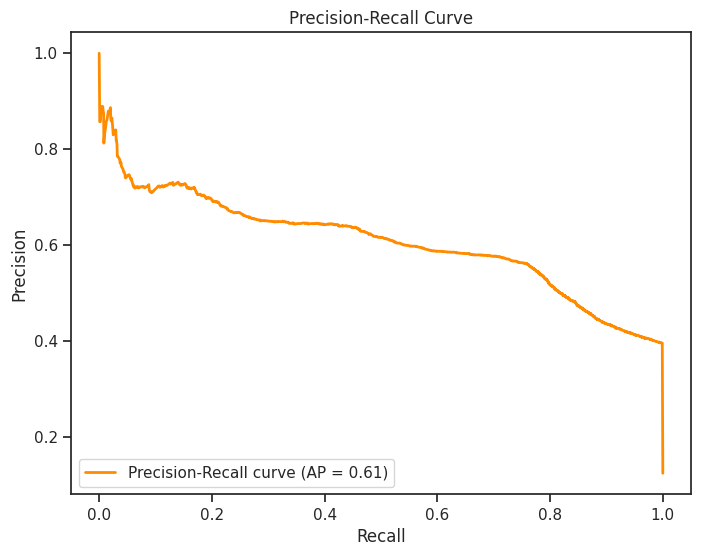

ROC AUC: 0.94
AP = 0.40
TP = 4823
FP = 3944
FN = 1430
TN = 40203
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     44147
           1       0.55      0.77      0.64      6253

    accuracy                           0.89     50400
   macro avg       0.76      0.84      0.79     50400
weighted avg       0.91      0.89      0.90     50400



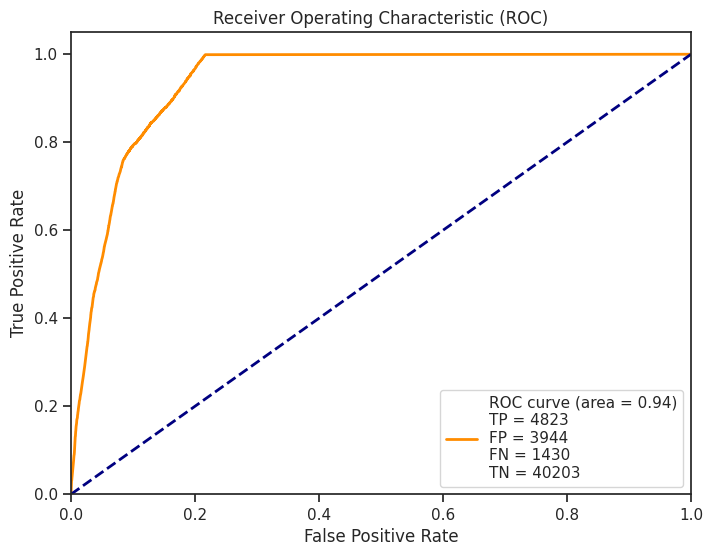

In [136]:
# Fit the best Random Forest classifier to the training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_B = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_B * 100:.2f}%")

# Calculate and print precision
precision_B = precision_score(y_test, y_pred)
print(f"Precision: {precision_B:.2f}")

# Calculate and print recall
recall_B = recall_score(y_test, y_pred)
print(f"Recall: {recall_B:.2f}")

# Calculate and print F1-score
f1_B = f1_score(y_test, y_pred)
print(f"F1-score: {f1_B:.2f}")

# Calculate the probability of class 1
y_prob = best_rf_classifier.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision_B, recall_B, _ = precision_recall_curve(y_test, y_prob)
average_precision_B = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_B, precision_B, color='darkorange', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_B))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Calculate ROC AUC
roc_auc_B = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc_B:.2f}")

# Calculate True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN)
tn_B, fp_B, fn_B, tp_B = confusion_matrix(y_test, y_pred).ravel()

print('AP = {:.2f}\nTP = {}\nFP = {}\nFN = {}\nTN = {}'.format(average_precision_best_A2, tp_B, fp_B, fn_B, tn_B))


# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})\nTP = {}\nFP = {}\nFN = {}\nTN = {}'.format(roc_auc_B, tp_B, fp_B, fn_B, tn_B))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



Principal Component Analysis (PCA) is a popular technique for dimensionality reduction in machine learning. It's used to reduce the number of features (dimensions) in a dataset while preserving as much of the variance or information as possible. so let us adopt it

C) Principal Component Analysis without any class weights

In [137]:
# Initialize PCA with the desired number of components
n_components = 2  # Specify the number of components you want to keep
pca = PCA(n_components=n_components)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train)

# Transform the test data using the same PCA model
X_test_pca = pca.transform(X_test)

# Now X_train_pca and X_test_pca contain the reduced-dimensional representations


In [138]:
# Initialize and train a machine learning model using X_train_pca
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)


RandomForestClassifier()

Accuracy: 89.44%
Precision: 0.58
F1-score: 0.56
Recall: 0.54
ROC AUC: 0.93


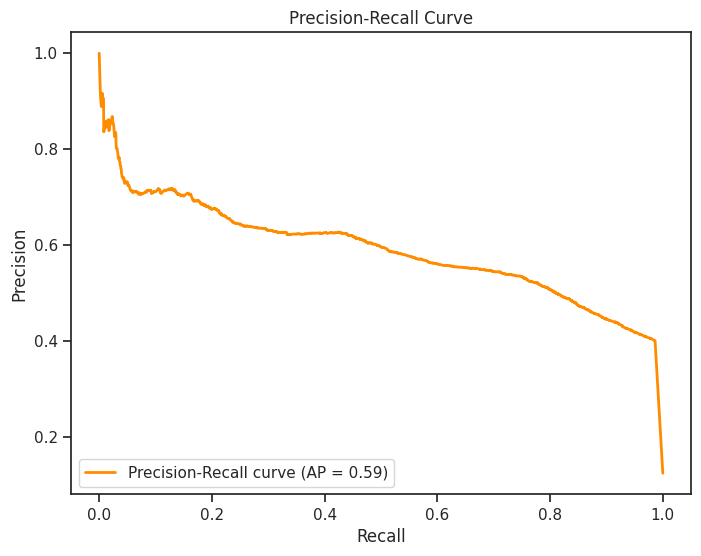

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     44147
           1       0.58      0.54      0.56      6253

    accuracy                           0.89     50400
   macro avg       0.76      0.74      0.75     50400
weighted avg       0.89      0.89      0.89     50400

True Positives (TP): 3398
False Positives (FP): 2469
False Negatives (FN): 2855
True Negatives (TN): 41678


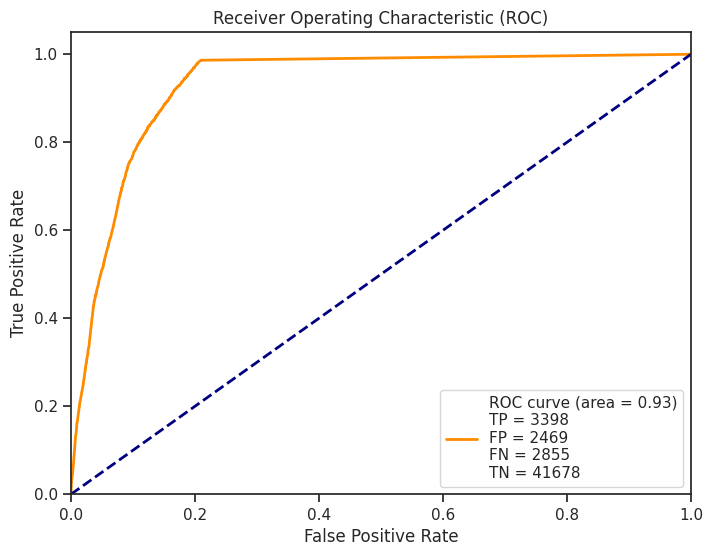

Accuracy: 89.44%
Precision: 0.58
F1-score: 0.56
Recall: 0.54
ROC AUC: 0.93


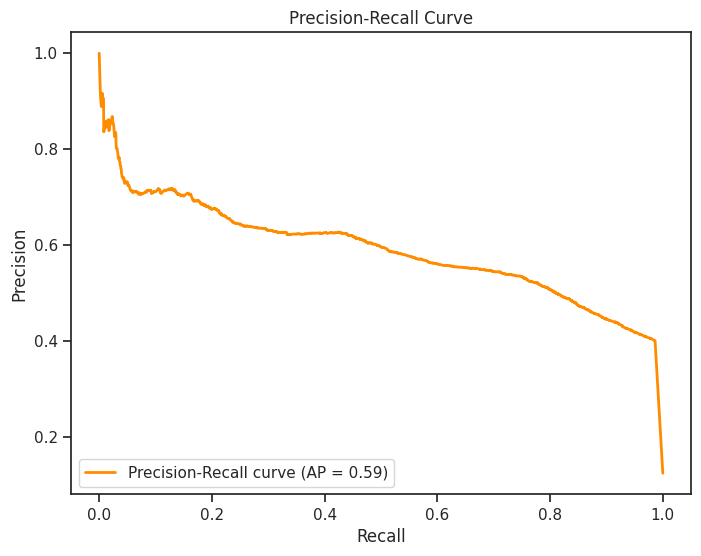

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     44147
           1       0.58      0.54      0.56      6253

    accuracy                           0.89     50400
   macro avg       0.76      0.74      0.75     50400
weighted avg       0.89      0.89      0.89     50400

True Positives (TP): 3398
False Positives (FP): 2469
False Negatives (FN): 2855
True Negatives (TN): 41678


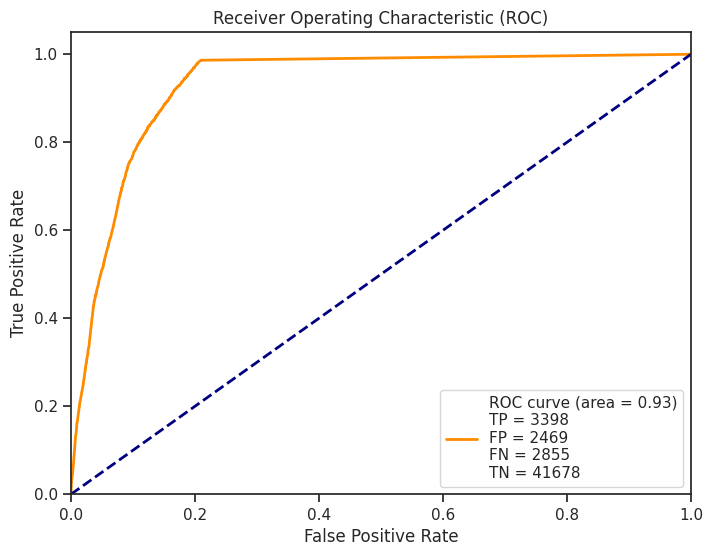

In [140]:
# Make predictions on the test data
y_pred = model.predict(X_test_pca)

# Calculate accuracy
accuracy_C = accuracy_score(y_test, y_pred)

# Calculate precision, F1-score, recall
precision_C = precision_score(y_test, y_pred)
f1_C = f1_score(y_test, y_pred)
recall_C = recall_score(y_test, y_pred)

# Calculate ROC-AUC score
y_prob = model.predict_proba(X_test_pca)[:, 1]  # Probability of class 1
roc_auc_C = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy_C * 100:.2f}%")
print(f"Precision: {precision_C:.2f}")
print(f"F1-score: {f1_C:.2f}")
print(f"Recall: {recall_C:.2f}")
print(f"ROC AUC: {roc_auc_C:.2f}")

# Calculate Precision-Recall curve
precision_C, recall_C, _ = precision_recall_curve(y_test, y_prob)
average_precision_C = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_C, precision_C, color='darkorange', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_C))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN)
tn_C, fp_C, fn_C, tp_C = confusion_matrix(y_test, y_pred).ravel()

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN)
print(f"True Positives (TP): {tp_C}")
print(f"False Positives (FP): {fp_C}")
print(f"False Negatives (FN): {fn_C}")
print(f"True Negatives (TN): {tn_C}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})\nTP = {}\nFP = {}\nFN = {}\nTN = {}'.format(roc_auc_C, tp_C, fp_C, fn_C, tn_C))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


we need F1 score for class imbalances, here score is veryless. hence we need to compensate for class imbalances

D) 1. Ensabled Method -Easy Ensemble for Imbalance class (Decision Tree)




/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_easy_ensemble.py:286: FutureWarning:

`base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.



Accuracy: 86.34%
Precision: 0.47
Recall: 0.85
F1-Score: 0.61
ROC AUC: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92     44147
           1       0.47      0.85      0.61      6253

    accuracy                           0.86     50400
   macro avg       0.72      0.86      0.76     50400
weighted avg       0.91      0.86      0.88     50400



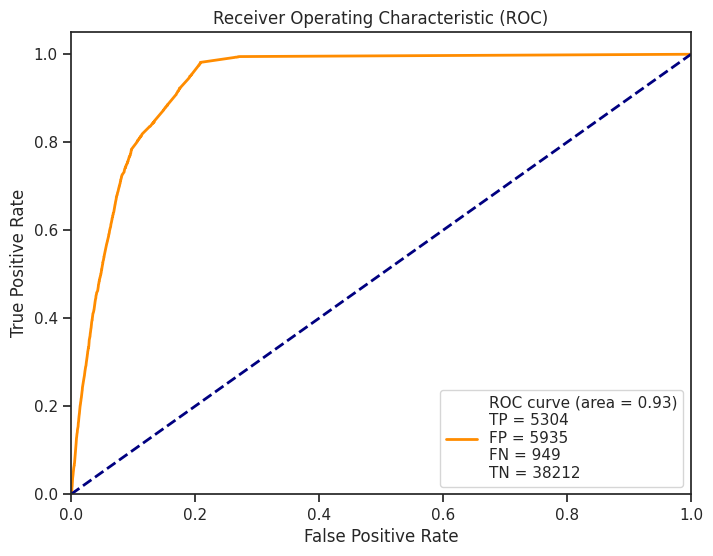

AP = 0.57
TP = 5304
FP = 5935
FN = 949
TN = 38212


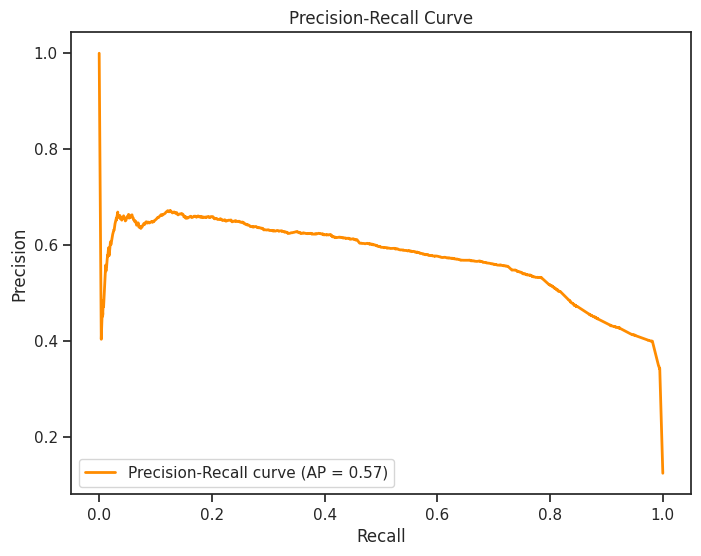

In [142]:
# Create an EasyEnsembleClassifier with DecisionTreeClassifier as the base estimator
easy_ensemble = EasyEnsembleClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Train the EasyEnsembleClassifier on the imbalanced training data
easy_ensemble.fit(X_train, y_train)

# Make predictions on the test data
y_pred = easy_ensemble.predict(X_test)

# Calculate Accuracy
accuracy_D1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_D1 * 100:.2f}%")

# Calculate Precision
precision_D1 = precision_score(y_test, y_pred)
print(f"Precision: {precision_D1:.2f}")

# Calculate Recall
recall_D1 = recall_score(y_test, y_pred)
print(f"Recall: {recall_D1:.2f}")

# Calculate F1-Score
f1_D1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1_D1:.2f}")

# Calculate ROC AUC
y_prob = easy_ensemble.predict_proba(X_test)[:, 1]
roc_auc_D1 = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc_D1:.2f}")

# Calculate True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN)
tn_D1, fp_D1, fn_D1, tp_D1 = confusion_matrix(y_test, y_pred).ravel()

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})\nTP = {}\nFP = {}\nFN = {}\nTN = {}'.format(roc_auc_D1, tp_D1, fp_D1, fn_D1, tn_D1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print('AP = {:.2f}\nTP = {}\nFP = {}\nFN = {}\nTN = {}'.format(average_precision_D1, tp_D1, fp_D1, fn_D1, tn_D1))


# Calculate Precision-Recall curve
precision_D1, recall_D1, _ = precision_recall_curve(y_test, y_prob)
average_precision_D1 = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_D1, precision_D1, color='darkorange', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_D1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


D. 2). Ensabled Method -Easy Ensemble for Imbalance class-Hyperparameter tuning
[first--> determine hyperparameter
second--> use it for Random forest application]

In [143]:
# Define the hyperparameter grid
param_dist = {
    'n_estimators': [5, 10, 15],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Create the EasyEnsembleClassifier with DecisionTreeClassifier as the base estimator
easy_ensemble = EasyEnsembleClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Create Randomized Search
random_search = RandomizedSearchCV(
    estimator=easy_ensemble, param_distributions=param_dist, scoring='precision', cv=3, random_state=42, n_jobs=-1
)

# Fit Randomized Search to your training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'n_estimators': 10, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 4, 'estimator__max_depth': None}


Accuracy: 0.8969047619047619
Precision: 0.6189511591267162
Recall: 0.43978890132736287
F1-Score: 0.5142109199700823
ROC AUC: 0.7007198748148128


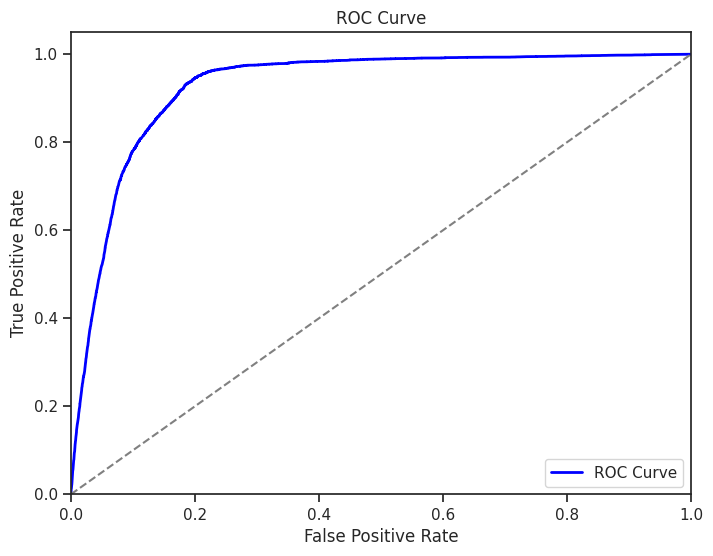

TP = 2750
FP = 1693
FN = 3503
TN = 42454


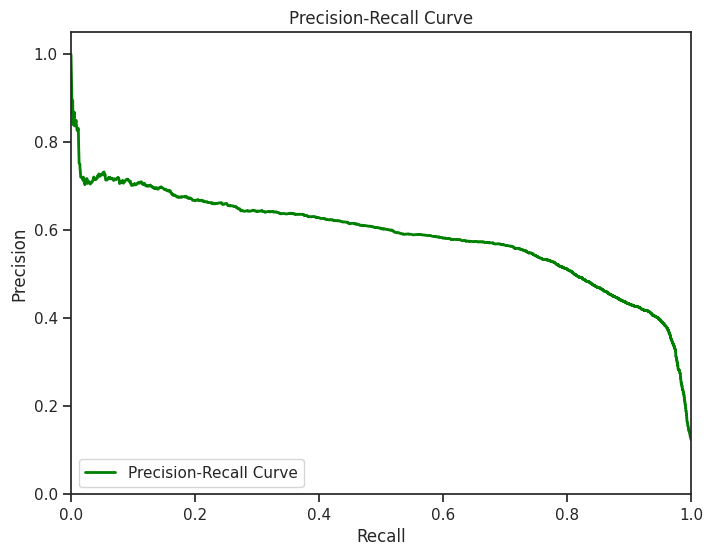

In [144]:
# Define the hyperparameters
max_depth = None
min_samples_leaf = 4
min_samples_split = 5
n_estimators = 10

# Create a Random Forest classifier with the specified hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    min_samples_split=min_samples_split,
    random_state=42  # You can set a random seed for reproducibility
)

# Fit the classifier to your training data (X_train and y_train)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_D2 = accuracy_score(y_test, y_pred)
precision_D2 = precision_score(y_test, y_pred)
recall_D2 = recall_score(y_test, y_pred)
f1_D2 = f1_score(y_test, y_pred)
roc_auc_D2 = roc_auc_score(y_test, y_pred)

# Calculate True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN)
tn_D2, fp_D2, fn_D2, tp_D2 = confusion_matrix(y_test, y_pred).ravel()

# Print the evaluation metrics
print("Accuracy:", accuracy_D2)
print("Precision:", precision_D2)
print("Recall:", recall_D2)
print("F1-Score:", f1_D2)
print("ROC AUC:", roc_auc_D2)

# Generate ROC curve and Precision-Recall curve
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision_D2, recall_D2, _ = precision_recall_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN)
print('TP = {}\nFP = {}\nFN = {}\nTN = {}'.format(tp_D2, fp_D2, fn_D2, tn_D2))

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_D2, precision_D2, color='green', lw=2, label='Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


A) 1. Decision Tree Modeling-class weights adopted

Hyper parameter Tuning -Reduced features -class weights adopted
B) Random Forest-CLASS WEIGHTS adopted

C) Principal Component Analysis without any class weights

D) 1. Ensabled Method -Easy Ensemble for Imbalance class (Decision Tree)

Ensabled Method -Easy Ensemble for Imbalance class-Hyperparameter tuning [first--> determine hyperparameter second--> use it for Random forest application]

In [272]:
# Define the evaluation metrics for different models
models = ['A 1. Decision Tree Modeling-class weights adopted', \
          'A 2. Hyper parameter Tuning -Reduced features -class weights adopted', \
          'B Random Forest-CLASS WEIGHTS adopted', 'C Principal Component Analysis without any class weights',
          'D 1. Ensabled Method -Easy Ensemble for Imbalance class (Decision Tree)',\
           'D 2. Ensabled Method -Easy Ensemble for Imbalance class-Hyperparameter tuning ']
accuracy = [accuracy_A1, accuracy_best_A2, accuracy_B, accuracy_C, accuracy_D1, accuracy_D2]
f1_score = [f1_A1, f1_best_A2, f1_B, f1_C, f1_D1, f1_D1]
roc_auc = [roc_auc_A1, roc_auc_best_A2, roc_auc_B, roc_auc_C, roc_auc_D1, roc_auc_D1]
TP      = [tp_A1, tp_best, tp_B, tp_C, tp_D1, tp_D2]
FP      = [fp_A1, fp_best, fp_B, fp_C, fp_D1, fp_D2]
FN      = [fn_A1, fn_best, fn_B, fn_C, fn_D1, fn_D2]
TN     = [tn_A1, tn_best, tn_B, tn_C, tn_D1, tn_D2]



# Create a table
table_data = zip(models, accuracy, f1_score, roc_auc, TP, FP, FN, TN)
headers = ['Model', 'Accuracy', 'F1-Score', 'ROC AUC', 'TP', 'FP', 'FN', 'TN']
table = tabulate(table_data, headers, tablefmt='grid')

# Print the table
print(table)

+-------------------------------------------------------------------------------+------------+------------+-----------+------+------+------+-------+
| Model                                                                         |   Accuracy |   F1-Score |   ROC AUC |   TP |   FP |   FN |    TN |
+===============================================================================+============+============+===========+======+======+======+=======+
| A 1. Decision Tree Modeling-class weights adopted                             |   0.878889 |   0.624739 |  0.850717 | 5081 | 4932 | 1172 | 39215 |
+-------------------------------------------------------------------------------+------------+------------+-----------+------+------+------+-------+
| A 2. Hyper parameter Tuning -Reduced features -class weights adopted          |   0.878175 |   0.622757 |  0.848802 | 5068 | 4955 | 1185 | 39192 |
+-------------------------------------------------------------------------------+------------+------------

For heavily imbalanced classes, F1-scale is considered to be ideal scale for comparison. so we can say that,  Decision Tree (A1) resulted in the best among all the considered models. Note, models B and C showed lower F1 scores but all other scores are higher, while A and D showed superior F1 scores (which is something like a mean of Precision and Recall). These A and D are either Decision Tree or hyper-tuned models wherehyperparameter is Decision Tree. So in the above problem, we can say that Decision Tree Modelling with or without hyper parameter tuning and with/without using ensambled technique are recommended.
  

Reference : https://thedatascientist.com/f-1-measure-useful-imbalanced-class-problems/